Big Data Mart Sales Problem

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

DataSets:
bigdatamart_Train.csv:
bigdatamart_Test.csv

IMPORTING LIBRARIES

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df1=pd.read_csv(r"C:\Users\polasasuresh\big_data.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [126]:
df2=pd.read_csv(r"C:\Users\polasasuresh\big_data_test.csv")
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


As the Big Data Mart Sales problem consists of 2 datasets one is training dataset and the other one is testing dataset

DataSets:
bigdatamart_Train.csv:this file consists of 8523 rows and 12 columns
bigdatamart_Test.csv: this file consists of 8523 rows and 12 columns
    
Item                      Description
Item_Identiier            Which is the product unique code
Item_Weight               Weight of the product
Item_Fat_Content          Describes whether the perticulat item contains fat/low fat/regular
Item_Visibility           Total display area of all the products in a store alloted to a perticular product
Item_type                 The categeory to which the product belongs to
Item_MRP                  Shows the Maximum retail price of the product
Outlet_Identifier         which is the uniqueId of the store
Outlet_Establishment year tells when the store is being etablished
Outlet_size               The size of the store including ground area covered
Outlet_Location_Type      The type of city to which the outlet is located
Outlet_Type               Tells the outlet is just a grocery store or a supermarket
Item_Outlet_Size          Tells the sales of the product in a perticular store.

Here Item_Outlet_Sales is a target variable we have to predict.

In [127]:
df1.shape

(8523, 12)

df1 consists of 8523 rows and 12 columns

In [128]:
df2.shape

(8523, 12)

df2 consists of 8523 rows and 12 columns

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


df1.info tells us total no of rows & columns, and datatypes of the columns. so,df1 consists of 3 float type of data,1 is integer type of data, and 7 is of object type of data.

In [130]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


df2.info tells us total no of rows & columns, and datatype of the columns. so,df2 consists 4 float type of data, 1 integer type of data and 7 object type of data

In [132]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


df1 contains some null values in the columns of Item_weight,Outlet_size so we have to fill these null values

In [133]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

df2 contains some null values in the Item_weight,Outlet_size columns
So, we have to fill these null values

In [134]:
#filling the null values of Item_weight column with mean of that column
df1['Item_Weight'].fillna(value=df1['Item_Weight'].mean(),inplace=True)
df2['Item_Weight'].fillna(value=df2['Item_Weight'].mean(),inplace=True)

In [135]:
df2['Outlet_Size'].mode()

0    Medium
dtype: object

In [136]:
#filling the null values of Outlet_Size. which is categeorical column.so we fill with the mode of that column
df1['Outlet_Size'].fillna(value=df1['Outlet_Size'].mode()[0],inplace=True)

In [137]:
df2['Outlet_Size'].fillna(value=df2['Outlet_Size'].mode()[0],inplace=True)

In [138]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no null values present in the df1

In [139]:
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no null values present in the df2

<AxesSubplot:>

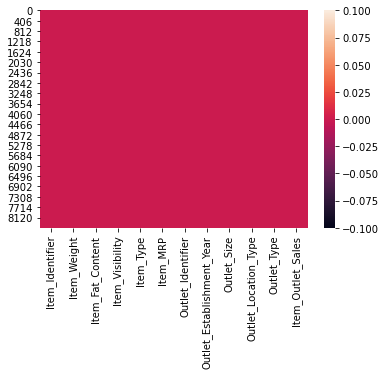

In [140]:
sns.heatmap(df1.isnull())

<AxesSubplot:>

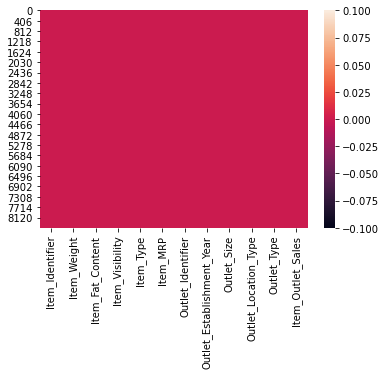

In [141]:
sns.heatmap(df2.isnull())

There is no missing data present in the data

In [142]:
df1.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

There are total 1559 unique items present,Item_Fat_Content is of 5 means 5 types of fat's present, There are 16 types of Items present and there 10 stores 

# Statistical Data Analysis

In [143]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


As the count says there are equal no of values in every column i.e tere are no null values.It is also showing mean,std, and quartiles of the numerical columns.Item_visibility minimum value is 0, it should not be.

In [144]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [145]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As the name 'LF' and 'low fat' comes into category of 'Low Fat'and 'reg' comes into 'Regular' category

In [146]:
# replacing LF and 'lowfat' with LowFat categeory and 'reg' with Regular categeory
for i in df1:
    df1[i]=df1[i].replace('LF','Low Fat')
    df1[i]=df1[i].replace('low fat','Low Fat')
    df1[i]=df1[i].replace('reg','Regular')
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [147]:
for i in df2:
    df2[i]=df2[i].replace('LF','Low Fat')
    df2[i]=df2[i].replace('low fat','Low Fat')
    df2[i]=df2[i].replace('reg','Regular')
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [148]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [149]:
df2['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

There are Too many categeories under ITe_Type,we can combine these categeories into 3

In [150]:
#Item type combine:
df1['Item_Identifier'].value_counts()
df1['Item_Type_Combined'] = df1['Item_Identifier'].apply(lambda x: x[0:2])
df1['Item_Type_Combined'] = df1['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df1['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [151]:
#Item type combine:
df2['Item_Identifier'].value_counts()
df2['Item_Type_Combined'] = df2['Item_Identifier'].apply(lambda x: x[0:2])
df2['Item_Type_Combined'] = df2['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df2['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [152]:
df1['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64

There are 526 rows with 0 Item_Visibility,so,we can fill these with mean values of that column

In [153]:
#first replace the 0.00 rows with the nan values then fill those nan values with mean of that column

In [154]:
df1['Item_Visibility']=df1['Item_Visibility'].replace({0:np.nan})
df1['Item_Visibility'].fillna(value=df1['Item_Visibility'].mean(),inplace=True)

In [155]:
df2['Item_Visibility']=df2['Item_Visibility'].replace({0:np.nan})
df2['Item_Visibility'].fillna(value=df2['Item_Visibility'].mean(),inplace=True)

In [156]:
df1['Item_Visibility'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool

In [157]:
#lets add a new feature that would have the numberof years the outlet has been in operation till 2013.


In [158]:
df1['years_of_operation']=2013-df1['Outlet_Establishment_Year']
df2['years_of_operation']=2013-df2['Outlet_Establishment_Year']

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  years_of_operation         8523 non-null   int64

# Data Visualization

In [160]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined',
       'years_of_operation'],
      dtype='object')

# Univariate Analysis

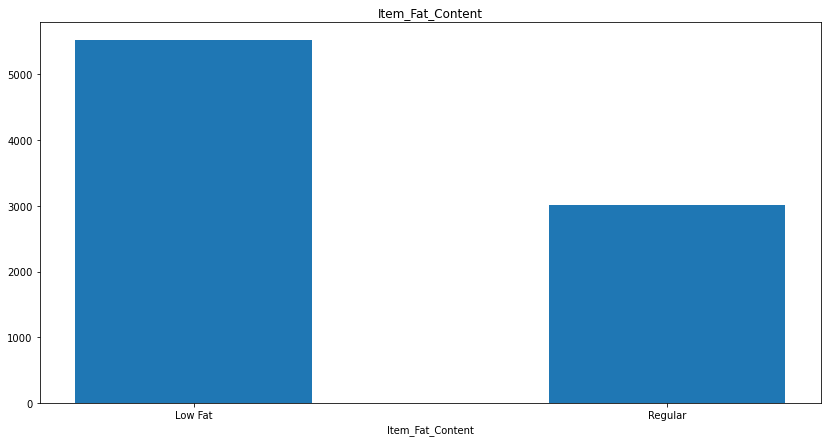

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [161]:
plt.figure(figsize=(14,7))
plt.bar(df1['Item_Fat_Content'].unique(),df1['Item_Fat_Content'].value_counts(),width=0.5,bottom=None,data=df1)
plt.title('Item_Fat_Content')
plt.xlabel("Item_Fat_Content")
plt.show()
df1['Item_Fat_Content'].value_counts()


LowFat are 3668 distributed and Regular fat content is 2013 distributed

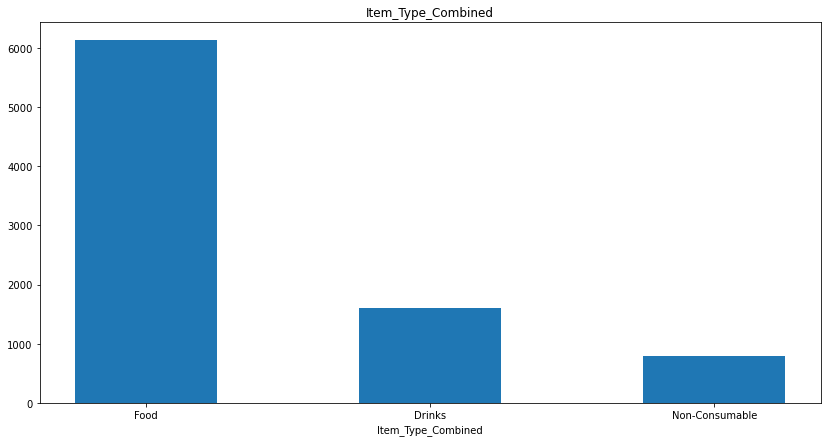

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [162]:
plt.figure(figsize=(14,7))
plt.bar(df1['Item_Type_Combined'].unique(),df1['Item_Type_Combined'].value_counts(),width=0.5,bottom=None,data=df1)
plt.title('Item_Type_Combined')
plt.xlabel("Item_Type_Combined")
plt.show()
df1['Item_Type_Combined'].value_counts()

Food is distributed upto 4076,Non_Consumables are distributed upto1087 and Drinks are distributed upto 518

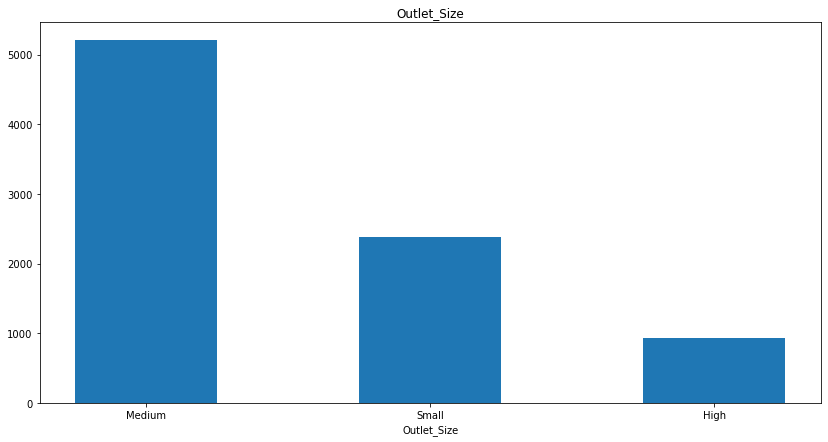

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [163]:
plt.figure(figsize=(14,7))
plt.bar(df1['Outlet_Size'].value_counts().index,df1['Outlet_Size'].value_counts(),width=0.5,bottom=None,data=df1)
plt.title('Outlet_Size')
plt.xlabel("Outlet_Size")
plt.show()
df1['Outlet_Size'].value_counts()

Outlet_size "Mediunm" is distributed upto1862,"small" is distributed upto 1592,"High" is distributed upto 621

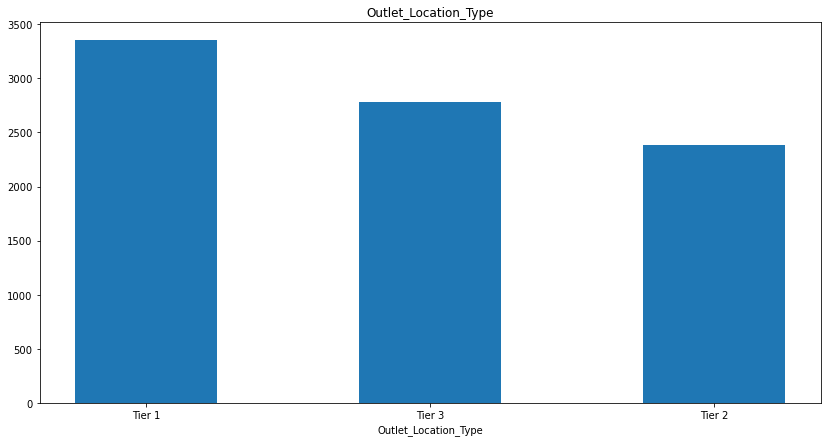

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [164]:

plt.figure(figsize=(14,7))
plt.bar(df1['Outlet_Location_Type'].unique(),df1['Outlet_Location_Type'].value_counts(),width=0.5,bottom=None,data=df1)
plt.title('Outlet_Location_Type')
plt.xlabel("Outlet_Location_Type")
plt.show()
df1['Outlet_Location_Type'].value_counts()

Outlet_Location_Type "Tier1" is located upto 1592, "Tier2" is located upto 1856, "Tier3" is located upto 2233

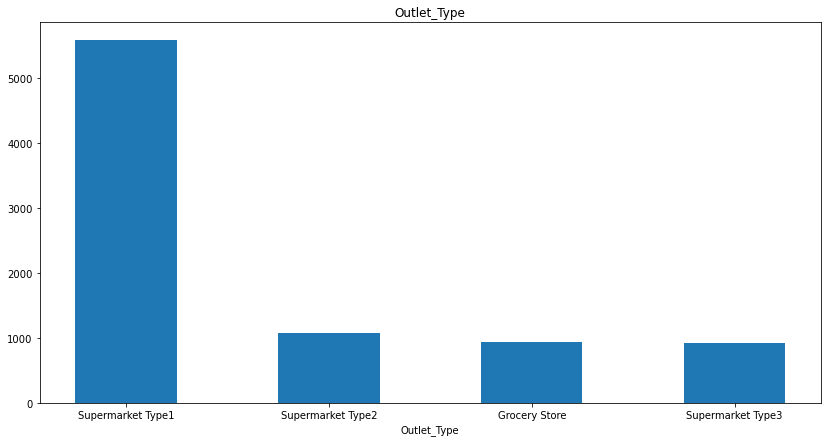

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [165]:
plt.figure(figsize=(14,7))
plt.bar(df1['Outlet_Type'].unique(),df1['Outlet_Type'].value_counts(),width=0.5,bottom=None,data=df1)
plt.title('Outlet_Type')
plt.xlabel("Outlet_Type")
plt.show()
df1['Outlet_Type'].value_counts()

Outlet_Type "Supermarket Type1" is distributed upto 3717,"Supermarket Type2" is distributed upto 618,"Supermarket Type3" is distributed upto 624,"Grocery store" is distributed upto 722

# Bivariate/Multivariate Annalysis

array([[<AxesSubplot:title={'center':'Grocery Store'}>,
        <AxesSubplot:title={'center':'Supermarket Type1'}>],
       [<AxesSubplot:title={'center':'Supermarket Type2'}>,
        <AxesSubplot:title={'center':'Supermarket Type3'}>]], dtype=object)

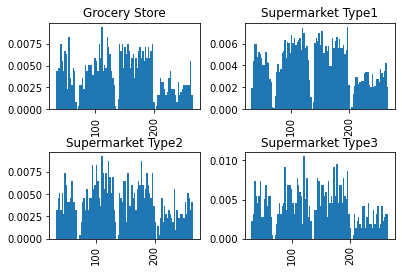

In [166]:
df1.hist(column='Item_MRP', by='Outlet_Type',bins=100,density=True)

As Item_Mrp is divided into 4 types Grocery store, SuperMarket,SuperMarket Type2,SuperMarketType3

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Medium'}>],
       [<AxesSubplot:title={'center':'Small'}>, <AxesSubplot:>]],
      dtype=object)

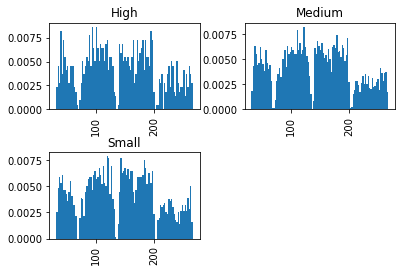

In [167]:
df1.hist(column='Item_MRP', by='Outlet_Size',bins=100,density=True)

Item_MRP is based on outlet_size whether it is small,medium,high

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

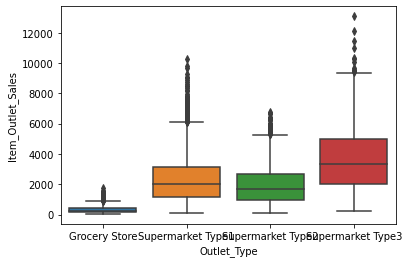

In [168]:
sns.boxplot(data=df1,x='Outlet_Type',y='Item_Outlet_Sales',order=['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'])

Grocerystore is having less no of sales compare to SuperMarketType2

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

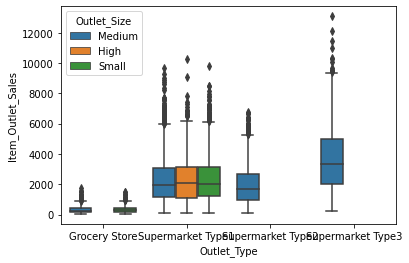

In [169]:
sns.boxplot(data=df1,x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',order=['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'])

Supermarket Type1 having 3 types of outletsizes and supermarket Type3 having highest Item_Outlet_Sales

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

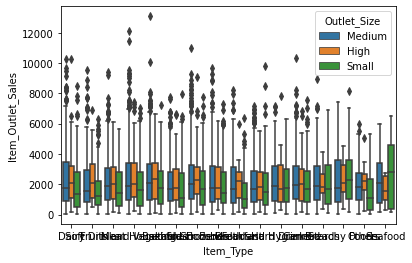

In [170]:
sns.boxplot(data=df1,x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Size')
df1['Item_Type'].value_counts()

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

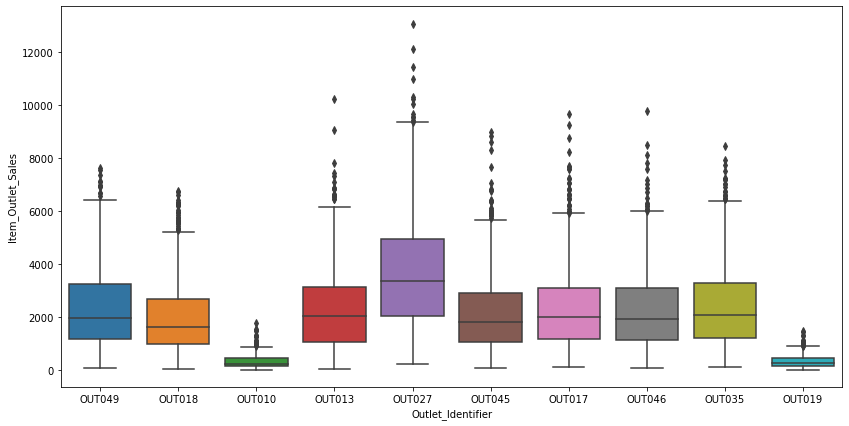

In [171]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df1,x='Outlet_Identifier',y='Item_Outlet_Sales')

'OUT10'&'OUT19' have less Item_Outlet_sales

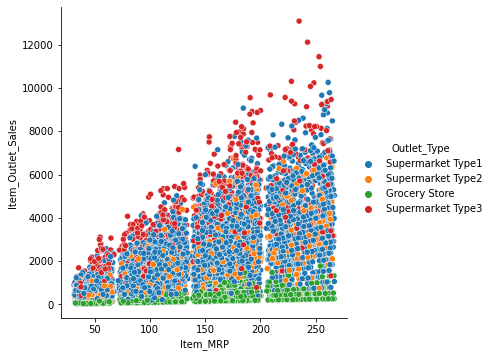

In [172]:
sns.pairplot(data=df1,x_vars='Item_MRP',y_vars='Item_Outlet_Sales',hue='Outlet_Type',size=5)

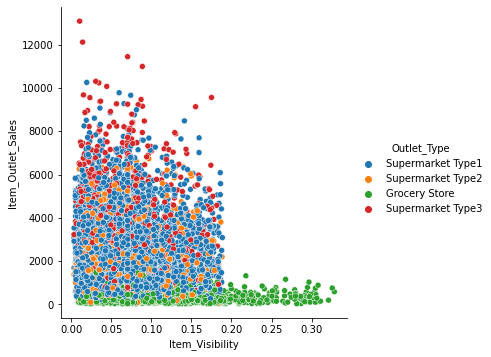

In [173]:
sns.pairplot(data=df1,x_vars='Item_Visibility',y_vars='Item_Outlet_Sales',hue='Outlet_Type',size=5)

# checking the distribution of continuous value of the float type columns 

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

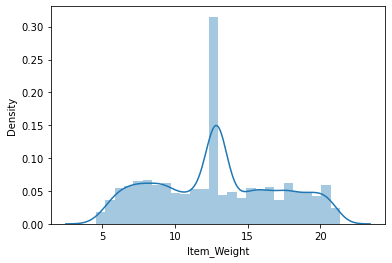

In [174]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df1['Item_Weight'],kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

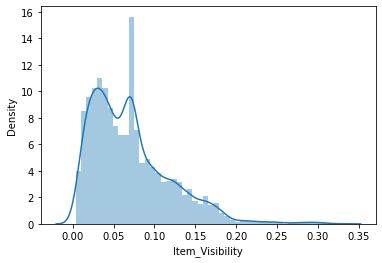

In [175]:
sns.distplot(df1['Item_Visibility'],kde=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

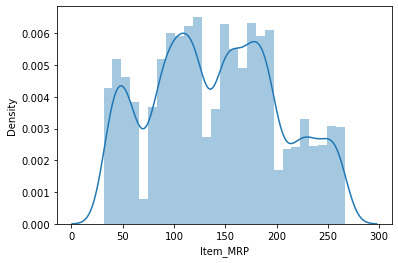

In [176]:
sns.distplot(df1['Item_MRP'],kde=True)

# Encoding Technique

As our data consists of categeorical data conert into numerical using OrdinalEncoder

In [177]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [178]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,years_of_operation
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,1.0,14
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,0.0,4
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,1.0,14
3,1121.0,19.200,1.0,0.070482,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800,1.0,15
4,1297.0,8.930,0.0,0.070482,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,2.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834,1.0,26
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850,1.0,11
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136,2.0,9
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976,1.0,4


In [179]:
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=enc.fit_transform(df2[i].values.reshape(-1,1))
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,years_of_operation
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,1.0,14
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,0.0,4
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,1.0,14
3,1121.0,19.200,1.0,0.070482,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800,1.0,15
4,1297.0,8.930,0.0,0.070482,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,2.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834,1.0,26
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850,1.0,11
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136,2.0,9
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976,1.0,4


# Describe the Dataset

In [180]:
df1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,years_of_operation
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.070482,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914,1.093864,15.168133
std,449.222377,4.226124,0.477836,0.048730,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616,0.522090,8.371760
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000,0.000000,4.000000
25%,395.500000,9.310000,0.000000,0.033085,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400,1.000000,9.000000
50%,783.000000,12.857645,0.000000,0.062517,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000,1.000000,14.000000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400,1.000000,26.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800,2.000000,28.000000


Here The count describes the same number for all the columns means there are no null values,It describes the min,max values and standard deviation and quartiles of the data

In [181]:
df2.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,years_of_operation
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.070482,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914,1.093864,15.168133
std,449.222377,4.226124,0.477836,0.048730,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616,0.522090,8.371760
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000,0.000000,4.000000
25%,395.500000,9.310000,0.000000,0.033085,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400,1.000000,9.000000
50%,783.000000,12.857645,0.000000,0.062517,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000,1.000000,14.000000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400,1.000000,26.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800,2.000000,28.000000


Here The count describes the same number for all the columns means there are no null values,It describes the min,max values and standard deviation and quartiles of the data

In [182]:
df1.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,years_of_operation
Item_Identifier,1.000000,0.044518,-0.114660,-0.029341,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869,0.787480,0.012772
Item_Weight,0.044518,1.000000,-0.021157,-0.017763,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550,0.063232,0.008301
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.049915,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719,-0.166111,-0.003151
Item_Visibility,-0.029341,-0.017763,0.049915,1.000000,-0.035922,-0.005515,-0.106405,-0.078316,0.072297,-0.027742,-0.179380,-0.134035,-0.046730,0.078316
Item_Type,-0.017973,0.028015,-0.139434,-0.035922,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048,0.007456,-0.004970
Item_MRP,0.012853,0.024756,0.006063,-0.005515,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574,0.032517,-0.005020
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.106405,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325,-0.009730,-0.079035
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.078316,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135,-0.008551,-1.000000
Outlet_Size,0.001389,-0.007225,-0.000622,0.072297,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182,-0.000624,-0.193389
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.027742,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367,0.007661,0.089216


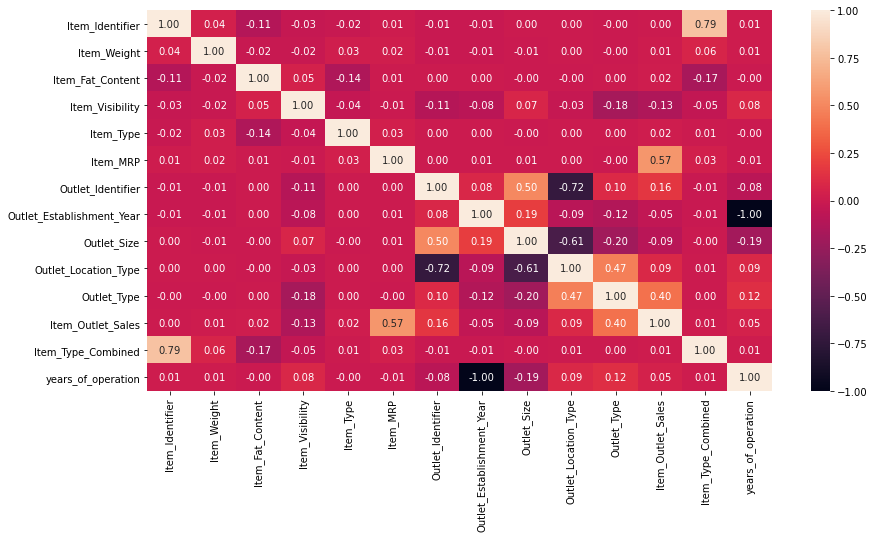

In [183]:
plt.figure(figsize=(14,7))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

 Item_type_combined is 79 % correlated with Item_Identifier,Outlet_Identifier is 50 % correlated with Outlet_size,Outlet_Type is 47% correlated with Outlet_Location_Type

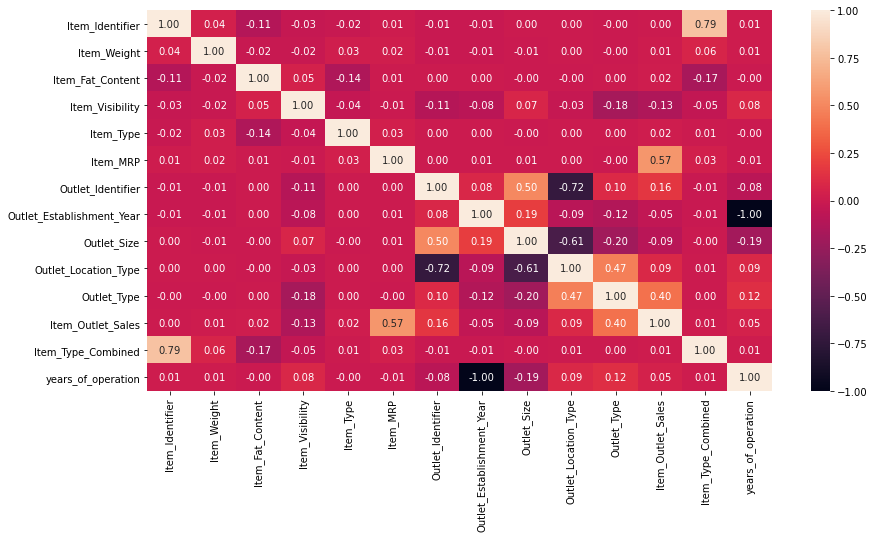

In [184]:
plt.figure(figsize=(14,7))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

Item_type_combined is 79 % correlated with Item_Identifier,Outlet_Identifier is 50 % correlated with Outlet_size,Outlet_Type is 47% correlated with Outlet_Location_Type

In [185]:
df1.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.271273
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
Item_Type_Combined           0.114510
years_of_operation           0.396641
dtype: float64

keeping skewness +/-0.5 here are the columns which are not in the range
Item_visibility,Outlet_Type,Item_Fat_content These are categeorical type

In [186]:
df2.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.271273
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
Item_Type_Combined           0.114510
years_of_operation           0.396641
dtype: float64

keeping skewness +/-0.5 here are the columns which are not in the range Item_visibility,Outlet_Type,Item_Fat_content These are categeorical type

# Outliers Checking

Item_Identifier                 AxesSubplot(0.125,0.125;0.0466867x0.755)
Item_Weight                  AxesSubplot(0.181024,0.125;0.0466867x0.755)
Item_Fat_Content             AxesSubplot(0.237048,0.125;0.0466867x0.755)
Item_Visibility              AxesSubplot(0.293072,0.125;0.0466867x0.755)
Item_Type                    AxesSubplot(0.349096,0.125;0.0466867x0.755)
Item_MRP                      AxesSubplot(0.40512,0.125;0.0466867x0.755)
Outlet_Identifier            AxesSubplot(0.461145,0.125;0.0466867x0.755)
Outlet_Establishment_Year    AxesSubplot(0.517169,0.125;0.0466867x0.755)
Outlet_Size                  AxesSubplot(0.573193,0.125;0.0466867x0.755)
Outlet_Location_Type         AxesSubplot(0.629217,0.125;0.0466867x0.755)
Outlet_Type                  AxesSubplot(0.685241,0.125;0.0466867x0.755)
Item_Outlet_Sales            AxesSubplot(0.741265,0.125;0.0466867x0.755)
Item_Type_Combined           AxesSubplot(0.797289,0.125;0.0466867x0.755)
years_of_operation           AxesSubplot(0.853313,0

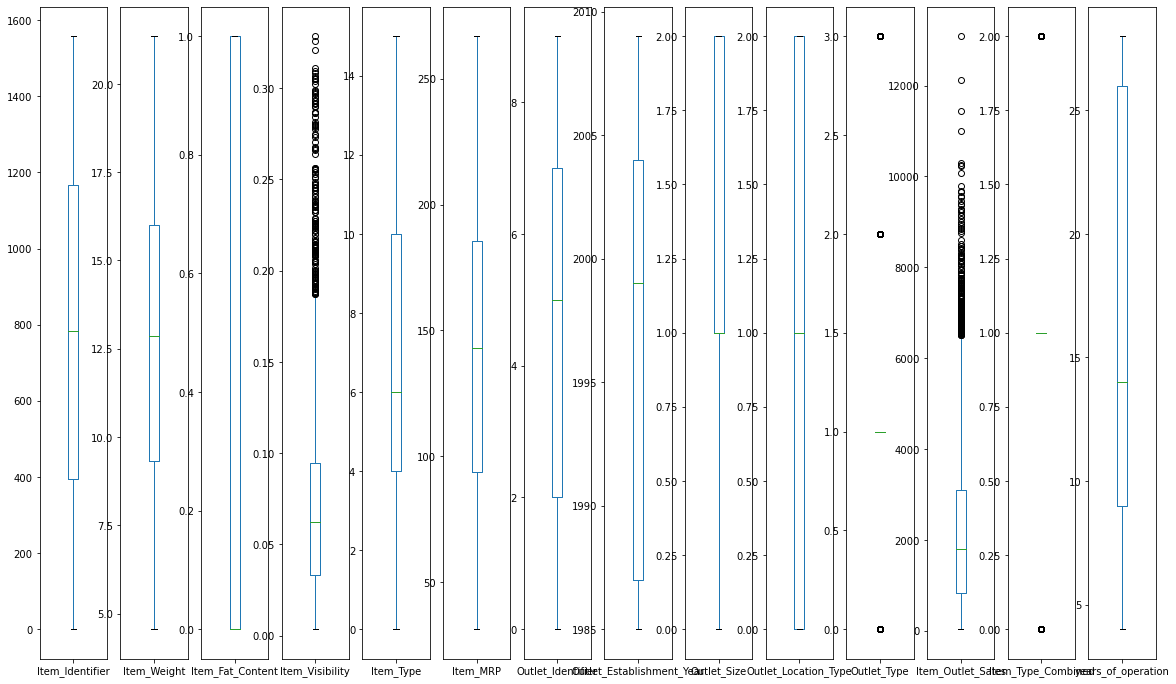

In [187]:
df1.plot(kind="box",subplots=True,figsize=(20,12))

There are no outliers present in the data,outlet_Type and Item_Type_Combined are of categeorical data

Item_Identifier                 AxesSubplot(0.125,0.125;0.0466867x0.755)
Item_Weight                  AxesSubplot(0.181024,0.125;0.0466867x0.755)
Item_Fat_Content             AxesSubplot(0.237048,0.125;0.0466867x0.755)
Item_Visibility              AxesSubplot(0.293072,0.125;0.0466867x0.755)
Item_Type                    AxesSubplot(0.349096,0.125;0.0466867x0.755)
Item_MRP                      AxesSubplot(0.40512,0.125;0.0466867x0.755)
Outlet_Identifier            AxesSubplot(0.461145,0.125;0.0466867x0.755)
Outlet_Establishment_Year    AxesSubplot(0.517169,0.125;0.0466867x0.755)
Outlet_Size                  AxesSubplot(0.573193,0.125;0.0466867x0.755)
Outlet_Location_Type         AxesSubplot(0.629217,0.125;0.0466867x0.755)
Outlet_Type                  AxesSubplot(0.685241,0.125;0.0466867x0.755)
Item_Outlet_Sales            AxesSubplot(0.741265,0.125;0.0466867x0.755)
Item_Type_Combined           AxesSubplot(0.797289,0.125;0.0466867x0.755)
years_of_operation           AxesSubplot(0.853313,0

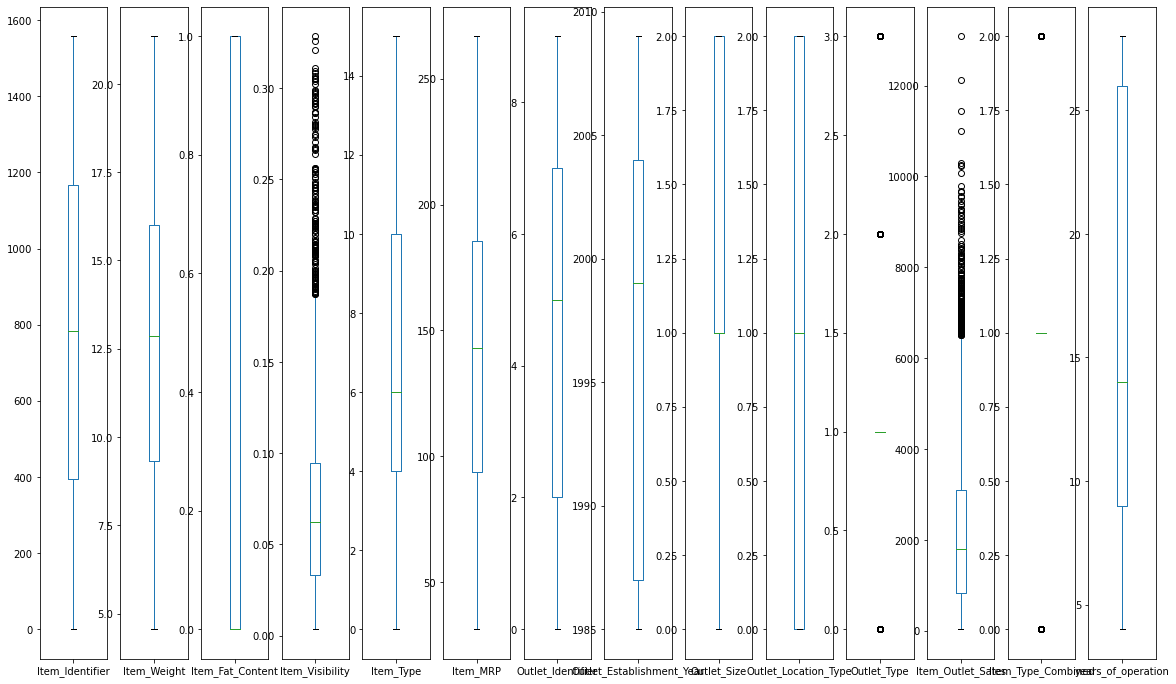

In [188]:
df2.plot(kind="box",subplots=True,figsize=(20,12))

There are no outliers present in the data,outlet_Type and Item_Type_Combined are of categeorical data

# Removing Outliers

In [189]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.38851383, 0.84187169, 0.73814723, ..., 0.910601  , 0.17979501,
        0.13954076],
       [1.71799137, 1.64170589, 1.35474328, ..., 1.01844035, 2.09528612,
        1.33410274],
       [0.26205684, 1.09855449, 0.73814723, ..., 0.04923754, 0.17979501,
        0.13954076],
       ...,
       [1.28515188, 0.53424315, 0.73814723, ..., 0.57909963, 1.73569609,
        0.73682175],
       [0.21975905, 1.33644372, 1.35474328, ..., 0.19672492, 0.17979501,
        1.33410274],
       [1.62449099, 0.45963367, 0.73814723, ..., 0.82959407, 2.09528612,
        0.09937163]])

In [190]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,years_of_operation
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,1.0,14
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,0.0,4
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,1.0,14
3,1121.0,19.200,1.0,0.070482,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800,1.0,15
4,1297.0,8.930,0.0,0.070482,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,2.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834,1.0,26
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850,1.0,11
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136,2.0,9
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976,1.0,4


In [191]:

from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[1.38851383, 0.84187169, 0.73814723, ..., 0.910601  , 0.17979501,
        0.13954076],
       [1.71799137, 1.64170589, 1.35474328, ..., 1.01844035, 2.09528612,
        1.33410274],
       [0.26205684, 1.09855449, 0.73814723, ..., 0.04923754, 0.17979501,
        0.13954076],
       ...,
       [1.28515188, 0.53424315, 0.73814723, ..., 0.57909963, 1.73569609,
        0.73682175],
       [0.21975905, 1.33644372, 1.35474328, ..., 0.19672492, 0.17979501,
        1.33410274],
       [1.62449099, 0.45963367, 0.73814723, ..., 0.82959407, 2.09528612,
        0.09937163]])

In [192]:
df2_new=df2[(z<3).all(axis=1)]
df2_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,years_of_operation
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,1.0,14
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,0.0,4
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,1.0,14
3,1121.0,19.200,1.0,0.070482,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800,1.0,15
4,1297.0,8.930,0.0,0.070482,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,2.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834,1.0,26
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850,1.0,11
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136,2.0,9
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976,1.0,4


In [193]:
df1_new.shape

(8335, 14)

In [194]:
df1.shape

(8523, 14)

In [195]:
df2_new.shape

(8335, 14)

In [196]:
df2.shape

(8523, 14)

In [197]:
data_loss_df1=((5681-5595)/5681)*100
data_loss_df1

1.51381798979053

In [198]:
data_loss_df2=((8523-8334)/8523)*100
data_loss_df2

2.2175290390707496

minimum 1% data loss in df1 and 2% data loss in df2

# seperating columns into features and target

In [199]:
x=df1_new.drop("Item_Outlet_Sales",axis=1)
y=df1_new["Item_Outlet_Sales"]

# Transforming data to remove skewness weuse power_transform method

In [200]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x


array([[-1.45945489, -0.81694419, -0.73684941, ..., -0.13537666,
        -0.1744713 ,  0.07612322],
       [-2.09360648, -1.72449935,  1.3571294 , ...,  1.05671325,
        -2.12227759, -1.64432913],
       [-0.1539454 ,  1.07917525, -0.73684941, ..., -0.13537666,
        -0.1744713 ,  0.07612322],
       ...,
       [ 1.20216671, -0.49260734, -0.73684941, ..., -0.13537666,
         1.71119364, -0.62002288],
       [-0.11257945, -1.3653269 ,  1.3571294 , ...,  1.05671325,
        -0.1744713 , -1.64432913],
       [-1.86136664,  0.48925237, -0.73684941, ..., -0.13537666,
        -2.12227759,  0.30716601]])

In [201]:
pd.DataFrame(x).skew()

0    -0.293614
1    -0.069830
2     0.620392
3     0.118455
4    -0.165735
5    -0.112658
6    -0.215054
7    -0.224908
8    -0.043925
9    -0.216807
10    0.010733
11    0.048068
12   -0.057616
dtype: float64

# scaling the data using MinMaxScaler

In [202]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
x1=mms.fit_transform(x)
x1

array([[-1.45945489, -0.81694419, -0.73684941, ..., -0.13537666,
        -0.1744713 ,  0.07612322],
       [-2.09360648, -1.72449935,  1.3571294 , ...,  1.05671325,
        -2.12227759, -1.64432913],
       [-0.1539454 ,  1.07917525, -0.73684941, ..., -0.13537666,
        -0.1744713 ,  0.07612322],
       ...,
       [ 1.20216671, -0.49260734, -0.73684941, ..., -0.13537666,
         1.71119364, -0.62002288],
       [-0.11257945, -1.3653269 ,  1.3571294 , ...,  1.05671325,
        -0.1744713 , -1.64432913],
       [-1.86136664,  0.48925237, -0.73684941, ..., -0.13537666,
        -2.12227759,  0.30716601]])

here we have scaled all the columns into the same scale

In [203]:
x=pd.DataFrame(x1,columns=pd.DataFrame(x).columns)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.459455,-0.816944,-0.736849,-1.441361,-0.713297,1.641204,1.417526,0.029051,-0.287290,-1.376098,-0.135377,-0.174471,0.076123
1,-2.093606,-1.724499,1.357129,-1.313796,1.506229,-1.591334,-0.557655,1.449398,-0.287290,1.095080,1.056713,-2.122278,-1.644329
2,-0.153945,1.079175,-0.736849,-1.412871,0.684342,0.097574,1.417526,0.029051,-0.287290,-1.376098,-0.135377,-0.174471,0.076123
3,0.771063,1.437470,1.357129,0.257234,-0.216378,0.707700,-1.816709,-0.095921,-0.287290,1.095080,-1.973828,-0.174471,0.194264
4,1.094762,-0.911430,-0.736849,0.257234,0.468051,-1.470926,-1.352096,-1.296852,-1.916724,1.095080,-0.135377,1.711194,1.233567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,-0.843115,-1.459636,-0.736849,-0.091213,1.306421,1.166215,-1.352096,-1.296852,-1.916724,1.095080,-0.135377,-0.174471,1.233567
8331,0.336911,-1.053835,1.357129,-0.369609,-1.922128,-0.449275,0.800759,0.421609,-0.287290,-0.126742,-0.135377,-0.174471,-0.316573
8332,1.202167,-0.492607,-0.736849,-0.741046,0.246375,-0.856832,0.479516,0.698692,1.393022,-0.126742,-0.135377,1.711194,-0.620023
8333,-0.112579,-1.365327,1.357129,1.549500,1.306421,-0.535658,-0.557655,1.449398,-0.287290,1.095080,1.056713,-0.174471,-1.644329


# Checking VIF

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif["features"]=pd.DataFrame(x).columns
vif

,vif,features
0,2.690720,0
1,1.006423,1
2,1.055615,2
3,1.037405,3
4,1.031202,4
5,1.004444,5
6,8.869906,6
7,281.437037,7
8,1.832830,8
9,6.273831,9


In [205]:
#dropping 'OUlet_Esablishment_year' since we got another column years_if_operation from 2013
df1.drop('Outlet_Establishment_Year',axis=1,inplace=True)
#df1.drop('Item_Type_Combined',axis=1,inplace=True)

# Model Building

since our target variable is a continuous variable so we use Linear Regression

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [207]:
for i in range(0,6000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random State {i} the training accuracy is:",r2_score(y_train,pred_train))
    print(f"At Random State {i} the testing accuracy is:",r2_score(y_test,pred_test))
    print("\n")
    

At Random State 0 the training accuracy is: 0.5429658919826466
At Random State 0 the testing accuracy is: 0.5442000343150062


At Random State 1 the training accuracy is: 0.5412229923176273
At Random State 1 the testing accuracy is: 0.5527262769299699


At Random State 2 the training accuracy is: 0.5384371571644144
At Random State 2 the testing accuracy is: 0.5609651656957784


At Random State 3 the training accuracy is: 0.5416740727439313
At Random State 3 the testing accuracy is: 0.5491374385585692


At Random State 4 the training accuracy is: 0.5425204190558173
At Random State 4 the testing accuracy is: 0.5469270669759125


At Random State 5 the training accuracy is: 0.5426546417602934
At Random State 5 the testing accuracy is: 0.5455606007276299


At Random State 6 the training accuracy is: 0.5438869005670856
At Random State 6 the testing accuracy is: 0.5413339555003047


At Random State 7 the training accuracy is: 0.544393400125148
At Random State 7 the testing accuracy is: 0.5394

At Random State 64 the training accuracy is: 0.5471192523856454
At Random State 64 the testing accuracy is: 0.5288798857747607


At Random State 65 the training accuracy is: 0.5498490338821829
At Random State 65 the testing accuracy is: 0.5174307155696521


At Random State 66 the training accuracy is: 0.5473057517902779
At Random State 66 the testing accuracy is: 0.5248304926718164


At Random State 67 the training accuracy is: 0.5479666913284639
At Random State 67 the testing accuracy is: 0.526361391477707


At Random State 68 the training accuracy is: 0.5449910090103143
At Random State 68 the testing accuracy is: 0.5364982976569045


At Random State 69 the training accuracy is: 0.5435886881489274
At Random State 69 the testing accuracy is: 0.5420179210503022


At Random State 70 the training accuracy is: 0.5448646924198077
At Random State 70 the testing accuracy is: 0.5373020008099936


At Random State 71 the training accuracy is: 0.5487445851094512
At Random State 71 the testing acc

At Random State 128 the training accuracy is: 0.5453296503262537
At Random State 128 the testing accuracy is: 0.5359765400930483


At Random State 129 the training accuracy is: 0.5502049363904764
At Random State 129 the testing accuracy is: 0.5147758491633398


At Random State 130 the training accuracy is: 0.545703250254169
At Random State 130 the testing accuracy is: 0.5345608172620436


At Random State 131 the training accuracy is: 0.5442087567075303
At Random State 131 the testing accuracy is: 0.5388273601313757


At Random State 132 the training accuracy is: 0.5429461828003508
At Random State 132 the testing accuracy is: 0.5442313142619171


At Random State 133 the training accuracy is: 0.5419849578788754
At Random State 133 the testing accuracy is: 0.5493075192876091


At Random State 134 the training accuracy is: 0.5431315400879679
At Random State 134 the testing accuracy is: 0.5446560284114903


At Random State 135 the training accuracy is: 0.54224283481125
At Random State 135 t

At Random State 192 the training accuracy is: 0.5455450263380387
At Random State 192 the testing accuracy is: 0.5356065199084834


At Random State 193 the training accuracy is: 0.5496861021673064
At Random State 193 the testing accuracy is: 0.5137563464575018


At Random State 194 the training accuracy is: 0.5441987669974784
At Random State 194 the testing accuracy is: 0.5399519974395403


At Random State 195 the training accuracy is: 0.5428873473726412
At Random State 195 the testing accuracy is: 0.5455991864048947


At Random State 196 the training accuracy is: 0.5410824664929921
At Random State 196 the testing accuracy is: 0.5523787047274582


At Random State 197 the training accuracy is: 0.5419299106391013
At Random State 197 the testing accuracy is: 0.5491745495170097


At Random State 198 the training accuracy is: 0.5417437759721915
At Random State 198 the testing accuracy is: 0.5504710695618351


At Random State 199 the training accuracy is: 0.5457146750043731
At Random State 19

At Random State 257 the training accuracy is: 0.539325090222635
At Random State 257 the testing accuracy is: 0.5596064265033912


At Random State 258 the training accuracy is: 0.5421276072516384
At Random State 258 the testing accuracy is: 0.547658084662267


At Random State 259 the training accuracy is: 0.5472393311972945
At Random State 259 the testing accuracy is: 0.5280497121313483


At Random State 260 the training accuracy is: 0.5439294618958064
At Random State 260 the testing accuracy is: 0.5415782730799477


At Random State 261 the training accuracy is: 0.5431460716149994
At Random State 261 the testing accuracy is: 0.5440538271272688


At Random State 262 the training accuracy is: 0.5450827475092199
At Random State 262 the testing accuracy is: 0.5368640077665414


At Random State 263 the training accuracy is: 0.5384506817211081
At Random State 263 the testing accuracy is: 0.5637873306242152


At Random State 264 the training accuracy is: 0.5434256124963003
At Random State 264 

At Random State 322 the training accuracy is: 0.5505408254100266
At Random State 322 the testing accuracy is: 0.5148341739219506


At Random State 323 the training accuracy is: 0.543646554449428
At Random State 323 the testing accuracy is: 0.5427642075828769


At Random State 324 the training accuracy is: 0.5404129788225196
At Random State 324 the testing accuracy is: 0.5543776326057819


At Random State 325 the training accuracy is: 0.5409857278038644
At Random State 325 the testing accuracy is: 0.5514289071175215


At Random State 326 the training accuracy is: 0.5440804962346184
At Random State 326 the testing accuracy is: 0.5404146164965727


At Random State 327 the training accuracy is: 0.5451408027713338
At Random State 327 the testing accuracy is: 0.5366532594362108


At Random State 328 the training accuracy is: 0.5418516787534164
At Random State 328 the testing accuracy is: 0.5500458235629561


At Random State 329 the training accuracy is: 0.5373584149678127
At Random State 329

At Random State 388 the training accuracy is: 0.5396754943612352
At Random State 388 the testing accuracy is: 0.5577158969240406


At Random State 389 the training accuracy is: 0.5453509380206276
At Random State 389 the testing accuracy is: 0.5346460784722887


At Random State 390 the training accuracy is: 0.5390059381557335
At Random State 390 the testing accuracy is: 0.5599012997876672


At Random State 391 the training accuracy is: 0.54716083930239
At Random State 391 the testing accuracy is: 0.5283258299495639


At Random State 392 the training accuracy is: 0.5413612997232692
At Random State 392 the testing accuracy is: 0.5509365549270324


At Random State 393 the training accuracy is: 0.5453708583864985
At Random State 393 the testing accuracy is: 0.5349490593721316


At Random State 394 the training accuracy is: 0.5438121856073412
At Random State 394 the testing accuracy is: 0.5415745184060189


At Random State 395 the training accuracy is: 0.5450149450014019
At Random State 395 

At Random State 455 the training accuracy is: 0.5465136147799168
At Random State 455 the testing accuracy is: 0.5298784732710144


At Random State 456 the training accuracy is: 0.5398828620534919
At Random State 456 the testing accuracy is: 0.5572428172020661


At Random State 457 the training accuracy is: 0.5434980515309018
At Random State 457 the testing accuracy is: 0.5429156160745308


At Random State 458 the training accuracy is: 0.5392709023277447
At Random State 458 the testing accuracy is: 0.5604963687681173


At Random State 459 the training accuracy is: 0.5439195873073683
At Random State 459 the testing accuracy is: 0.5413501539922958


At Random State 460 the training accuracy is: 0.5414234310700818
At Random State 460 the testing accuracy is: 0.551654534718315


At Random State 461 the training accuracy is: 0.5388164515395135
At Random State 461 the testing accuracy is: 0.5616825135525645


At Random State 462 the training accuracy is: 0.5475054497635348
At Random State 462

At Random State 522 the training accuracy is: 0.5486989628924951
At Random State 522 the testing accuracy is: 0.5190006036238669


At Random State 523 the training accuracy is: 0.5467313724401808
At Random State 523 the testing accuracy is: 0.5302645504098191


At Random State 524 the training accuracy is: 0.5452300638524639
At Random State 524 the testing accuracy is: 0.5361579612663647


At Random State 525 the training accuracy is: 0.5438112857462938
At Random State 525 the testing accuracy is: 0.5418904977790415


At Random State 526 the training accuracy is: 0.5424591340354141
At Random State 526 the testing accuracy is: 0.5465313467986439


At Random State 527 the training accuracy is: 0.5474012957445069
At Random State 527 the testing accuracy is: 0.5260879795669671


At Random State 528 the training accuracy is: 0.5471188526483881
At Random State 528 the testing accuracy is: 0.5278024037065329


At Random State 529 the training accuracy is: 0.5464259707697998
At Random State 52

At Random State 587 the training accuracy is: 0.5374980239853608
At Random State 587 the testing accuracy is: 0.5667003537196142


At Random State 588 the training accuracy is: 0.5415651061340805
At Random State 588 the testing accuracy is: 0.5503130115261177


At Random State 589 the training accuracy is: 0.5456721611292665
At Random State 589 the testing accuracy is: 0.5336919241295204


At Random State 590 the training accuracy is: 0.5505238670870005
At Random State 590 the testing accuracy is: 0.5154688768753106


At Random State 591 the training accuracy is: 0.5398418152329678
At Random State 591 the testing accuracy is: 0.5583141268878857


At Random State 592 the training accuracy is: 0.5481214396107643
At Random State 592 the testing accuracy is: 0.5239187015634643


At Random State 593 the training accuracy is: 0.5501753403844545
At Random State 593 the testing accuracy is: 0.5155426237312192


At Random State 594 the training accuracy is: 0.5403891096339518
At Random State 59

At Random State 650 the training accuracy is: 0.5490764869962251
At Random State 650 the testing accuracy is: 0.5183020108217746


At Random State 651 the training accuracy is: 0.5423759548038545
At Random State 651 the testing accuracy is: 0.5471544810469771


At Random State 652 the training accuracy is: 0.5428276357135128
At Random State 652 the testing accuracy is: 0.5455850295322697


At Random State 653 the training accuracy is: 0.5376776043437459
At Random State 653 the testing accuracy is: 0.5629335464639065


At Random State 654 the training accuracy is: 0.5447193958448904
At Random State 654 the testing accuracy is: 0.5362584265651227


At Random State 655 the training accuracy is: 0.5435359015776664
At Random State 655 the testing accuracy is: 0.5427137038762319


At Random State 656 the training accuracy is: 0.5431685672929284
At Random State 656 the testing accuracy is: 0.5433711564475576


At Random State 657 the training accuracy is: 0.5355889781876974
At Random State 65

At Random State 718 the training accuracy is: 0.540404090750226
At Random State 718 the testing accuracy is: 0.5553348014201064


At Random State 719 the training accuracy is: 0.5403679043465855
At Random State 719 the testing accuracy is: 0.555143893615877


At Random State 720 the training accuracy is: 0.5497020001143342
At Random State 720 the testing accuracy is: 0.5186780394969608


At Random State 721 the training accuracy is: 0.5425971423623726
At Random State 721 the testing accuracy is: 0.546042164044128


At Random State 722 the training accuracy is: 0.54448173668288
At Random State 722 the testing accuracy is: 0.5395178794936887


At Random State 723 the training accuracy is: 0.5405810426586434
At Random State 723 the testing accuracy is: 0.5546610939139265


At Random State 724 the training accuracy is: 0.5471378543875409
At Random State 724 the testing accuracy is: 0.5277543178854953


At Random State 725 the training accuracy is: 0.5444131597937429
At Random State 725 the

At Random State 781 the training accuracy is: 0.5411059840177087
At Random State 781 the testing accuracy is: 0.5530003120856622


At Random State 782 the training accuracy is: 0.5490349700595345
At Random State 782 the testing accuracy is: 0.5211783162243597


At Random State 783 the training accuracy is: 0.5441491946877401
At Random State 783 the testing accuracy is: 0.5401169440173506


At Random State 784 the training accuracy is: 0.5422434630280976
At Random State 784 the testing accuracy is: 0.5472375976400312


At Random State 785 the training accuracy is: 0.5445174840442351
At Random State 785 the testing accuracy is: 0.5390938394023415


At Random State 786 the training accuracy is: 0.5359686281890539
At Random State 786 the testing accuracy is: 0.5730495634489332


At Random State 787 the training accuracy is: 0.5435538466839835
At Random State 787 the testing accuracy is: 0.5430788678481326


At Random State 788 the training accuracy is: 0.5437133468572806
At Random State 78

At Random State 848 the training accuracy is: 0.5421672535163222
At Random State 848 the testing accuracy is: 0.5488723085645706


At Random State 849 the training accuracy is: 0.5455313977684282
At Random State 849 the testing accuracy is: 0.5355740403441307


At Random State 850 the training accuracy is: 0.5477759008591236
At Random State 850 the testing accuracy is: 0.5254002462407932


At Random State 851 the training accuracy is: 0.5451492294596849
At Random State 851 the testing accuracy is: 0.5355922440398497


At Random State 852 the training accuracy is: 0.5392999258903545
At Random State 852 the testing accuracy is: 0.5583778045126551


At Random State 853 the training accuracy is: 0.5443141008515164
At Random State 853 the testing accuracy is: 0.5401296871335117


At Random State 854 the training accuracy is: 0.5471826449029382
At Random State 854 the testing accuracy is: 0.527883648365781


At Random State 855 the training accuracy is: 0.5403291117928355
At Random State 855

At Random State 912 the training accuracy is: 0.543434667057352
At Random State 912 the testing accuracy is: 0.5430596005627302


At Random State 913 the training accuracy is: 0.5439357996529965
At Random State 913 the testing accuracy is: 0.5410411357599286


At Random State 914 the training accuracy is: 0.5468309786859387
At Random State 914 the testing accuracy is: 0.5290801142809342


At Random State 915 the training accuracy is: 0.5414487285616717
At Random State 915 the testing accuracy is: 0.5506573917151294


At Random State 916 the training accuracy is: 0.548012685413731
At Random State 916 the testing accuracy is: 0.5246200744464289


At Random State 917 the training accuracy is: 0.5475607655324658
At Random State 917 the testing accuracy is: 0.526139695800941


At Random State 918 the training accuracy is: 0.545741195621787
At Random State 918 the testing accuracy is: 0.5327700129069002


At Random State 919 the training accuracy is: 0.5415622485793206
At Random State 919 th

At Random State 978 the training accuracy is: 0.549739638437363
At Random State 978 the testing accuracy is: 0.5169684380924695


At Random State 979 the training accuracy is: 0.542506967367945
At Random State 979 the testing accuracy is: 0.5471746080015263


At Random State 980 the training accuracy is: 0.5463623539583775
At Random State 980 the testing accuracy is: 0.5301821566128355


At Random State 981 the training accuracy is: 0.5410178394882648
At Random State 981 the testing accuracy is: 0.5513091737334401


At Random State 982 the training accuracy is: 0.5425098791391967
At Random State 982 the testing accuracy is: 0.5468682175867845


At Random State 983 the training accuracy is: 0.5407522728754047
At Random State 983 the testing accuracy is: 0.5538359499083501


At Random State 984 the training accuracy is: 0.5422946588959051
At Random State 984 the testing accuracy is: 0.5472389360201778


At Random State 985 the training accuracy is: 0.5493180633059672
At Random State 985 

At Random State 1044 the training accuracy is: 0.5425370469474808
At Random State 1044 the testing accuracy is: 0.5461178950407604


At Random State 1045 the training accuracy is: 0.5411802111269395
At Random State 1045 the testing accuracy is: 0.5521982277087512


At Random State 1046 the training accuracy is: 0.5520739416033658
At Random State 1046 the testing accuracy is: 0.5051339070142191


At Random State 1047 the training accuracy is: 0.5445872939657188
At Random State 1047 the testing accuracy is: 0.5387119292317812


At Random State 1048 the training accuracy is: 0.540011995590602
At Random State 1048 the testing accuracy is: 0.5553780097729657


At Random State 1049 the training accuracy is: 0.5395485936926243
At Random State 1049 the testing accuracy is: 0.558850018450671


At Random State 1050 the training accuracy is: 0.5415500571515386
At Random State 1050 the testing accuracy is: 0.551051371975152


At Random State 1051 the training accuracy is: 0.5458179045994183
At Ran

At Random State 1110 the training accuracy is: 0.5466543732686944
At Random State 1110 the testing accuracy is: 0.5308058019523212


At Random State 1111 the training accuracy is: 0.545248632922944
At Random State 1111 the testing accuracy is: 0.5365399938066189


At Random State 1112 the training accuracy is: 0.5398585972279614
At Random State 1112 the testing accuracy is: 0.5569471299280329


At Random State 1113 the training accuracy is: 0.5365877017548233
At Random State 1113 the testing accuracy is: 0.570134592420166


At Random State 1114 the training accuracy is: 0.5415141618469675
At Random State 1114 the testing accuracy is: 0.5505254384548527


At Random State 1115 the training accuracy is: 0.5428035726126899
At Random State 1115 the testing accuracy is: 0.5455531821643579


At Random State 1116 the training accuracy is: 0.5465960845520548
At Random State 1116 the testing accuracy is: 0.5310039297087934


At Random State 1117 the training accuracy is: 0.544884022621287
At Ran

At Random State 1174 the training accuracy is: 0.5387523939001369
At Random State 1174 the testing accuracy is: 0.5632146165267891


At Random State 1175 the training accuracy is: 0.54605386684531
At Random State 1175 the testing accuracy is: 0.5309781637295463


At Random State 1176 the training accuracy is: 0.545099984527033
At Random State 1176 the testing accuracy is: 0.5365436711139533


At Random State 1177 the training accuracy is: 0.5402251221886838
At Random State 1177 the testing accuracy is: 0.5561082459406101


At Random State 1178 the training accuracy is: 0.5421817458538636
At Random State 1178 the testing accuracy is: 0.5475736472600186


At Random State 1179 the training accuracy is: 0.5465895542094432
At Random State 1179 the testing accuracy is: 0.5306748722020413


At Random State 1180 the training accuracy is: 0.5328814421215784
At Random State 1180 the testing accuracy is: 0.5820002661620997


At Random State 1181 the training accuracy is: 0.544864738566067
At Rand

At Random State 1237 the training accuracy is: 0.5430587682157771
At Random State 1237 the testing accuracy is: 0.5445298286424949


At Random State 1238 the training accuracy is: 0.5427568661321582
At Random State 1238 the testing accuracy is: 0.5452913037198313


At Random State 1239 the training accuracy is: 0.5438889759903731
At Random State 1239 the testing accuracy is: 0.5409562890444155


At Random State 1240 the training accuracy is: 0.5441806729383831
At Random State 1240 the testing accuracy is: 0.5381604570652168


At Random State 1241 the training accuracy is: 0.542019480607925
At Random State 1241 the testing accuracy is: 0.5491330609838101


At Random State 1242 the training accuracy is: 0.5466781528467928
At Random State 1242 the testing accuracy is: 0.5303066860135612


At Random State 1243 the training accuracy is: 0.5422070717432909
At Random State 1243 the testing accuracy is: 0.5478067396956574


At Random State 1244 the training accuracy is: 0.5441356793312494
At R

At Random State 1299 the training accuracy is: 0.5390164174016645
At Random State 1299 the testing accuracy is: 0.5585761535075899


At Random State 1300 the training accuracy is: 0.5377257661176782
At Random State 1300 the testing accuracy is: 0.5664526639713147


At Random State 1301 the training accuracy is: 0.5420884683310574
At Random State 1301 the testing accuracy is: 0.5481384168538019


At Random State 1302 the training accuracy is: 0.5423548712448893
At Random State 1302 the testing accuracy is: 0.5474649683951214


At Random State 1303 the training accuracy is: 0.5427294377946642
At Random State 1303 the testing accuracy is: 0.5460239849346232


At Random State 1304 the training accuracy is: 0.5439800830892605
At Random State 1304 the testing accuracy is: 0.5412868397445968


At Random State 1305 the training accuracy is: 0.5409824686698205
At Random State 1305 the testing accuracy is: 0.5528815245704237


At Random State 1306 the training accuracy is: 0.5390677151771535
At 

At Random State 1362 the training accuracy is: 0.5427967974969684
At Random State 1362 the testing accuracy is: 0.5450515707662654


At Random State 1363 the training accuracy is: 0.5443664614599459
At Random State 1363 the testing accuracy is: 0.5397022886416368


At Random State 1364 the training accuracy is: 0.5426037839131826
At Random State 1364 the testing accuracy is: 0.5465310545084954


At Random State 1365 the training accuracy is: 0.5434256408535839
At Random State 1365 the testing accuracy is: 0.542016336751888


At Random State 1366 the training accuracy is: 0.5401831609226792
At Random State 1366 the testing accuracy is: 0.5560837870023723


At Random State 1367 the training accuracy is: 0.5490037606832594
At Random State 1367 the testing accuracy is: 0.5196366586051944


At Random State 1368 the training accuracy is: 0.5438904076379563
At Random State 1368 the testing accuracy is: 0.5401928380788601


At Random State 1369 the training accuracy is: 0.5401444057836065
At R

At Random State 1424 the training accuracy is: 0.5411456055940469
At Random State 1424 the testing accuracy is: 0.5531269500864793


At Random State 1425 the training accuracy is: 0.544303448437317
At Random State 1425 the testing accuracy is: 0.5395409530888808


At Random State 1426 the training accuracy is: 0.544721853828846
At Random State 1426 the testing accuracy is: 0.537551402245968


At Random State 1427 the training accuracy is: 0.5453396884253656
At Random State 1427 the testing accuracy is: 0.5360922083460304


At Random State 1428 the training accuracy is: 0.5398125604791774
At Random State 1428 the testing accuracy is: 0.5583987365483221


At Random State 1429 the training accuracy is: 0.5411305685063177
At Random State 1429 the testing accuracy is: 0.5511239311706871


At Random State 1430 the training accuracy is: 0.541143496801415
At Random State 1430 the testing accuracy is: 0.5527509580707999


At Random State 1431 the training accuracy is: 0.5438063166026682
At Rand

At Random State 1486 the testing accuracy is: 0.5329829166415863


At Random State 1487 the training accuracy is: 0.5462439598056763
At Random State 1487 the testing accuracy is: 0.5323424089918676


At Random State 1488 the training accuracy is: 0.5417231370701997
At Random State 1488 the testing accuracy is: 0.5488757033874827


At Random State 1489 the training accuracy is: 0.5400899337113496
At Random State 1489 the testing accuracy is: 0.5559912461339064


At Random State 1490 the training accuracy is: 0.5449979157171022
At Random State 1490 the testing accuracy is: 0.5372267485445713


At Random State 1491 the training accuracy is: 0.5472926800120597
At Random State 1491 the testing accuracy is: 0.5271743194654519


At Random State 1492 the training accuracy is: 0.5418278283880522
At Random State 1492 the testing accuracy is: 0.5493298227253737


At Random State 1493 the training accuracy is: 0.5445010424276939
At Random State 1493 the testing accuracy is: 0.5392900999959893


At

At Random State 1552 the training accuracy is: 0.5431513627781202
At Random State 1552 the testing accuracy is: 0.5436724285932091


At Random State 1553 the training accuracy is: 0.5451445887297801
At Random State 1553 the testing accuracy is: 0.5362080356696541


At Random State 1554 the training accuracy is: 0.5371169901932363
At Random State 1554 the testing accuracy is: 0.5674427744484813


At Random State 1555 the training accuracy is: 0.5451876590549788
At Random State 1555 the testing accuracy is: 0.5360157151096435


At Random State 1556 the training accuracy is: 0.5406751406456867
At Random State 1556 the testing accuracy is: 0.55407561023634


At Random State 1557 the training accuracy is: 0.5465947948561618
At Random State 1557 the testing accuracy is: 0.5298030374291703


At Random State 1558 the training accuracy is: 0.5390447653627257
At Random State 1558 the testing accuracy is: 0.5609474557908505


At Random State 1559 the training accuracy is: 0.5404083337425616
At Ra

At Random State 1614 the training accuracy is: 0.5453649119744253
At Random State 1614 the testing accuracy is: 0.536036975898762


At Random State 1615 the training accuracy is: 0.5460043412346133
At Random State 1615 the testing accuracy is: 0.5327409529354152


At Random State 1616 the training accuracy is: 0.5455840060950923
At Random State 1616 the testing accuracy is: 0.5350712815950016


At Random State 1617 the training accuracy is: 0.5496959543478588
At Random State 1617 the testing accuracy is: 0.5189453321644457


At Random State 1618 the training accuracy is: 0.5442851321942264
At Random State 1618 the testing accuracy is: 0.5391207154721229


At Random State 1619 the training accuracy is: 0.5393434370597814
At Random State 1619 the testing accuracy is: 0.5592435025492226


At Random State 1620 the training accuracy is: 0.5496854581931689
At Random State 1620 the testing accuracy is: 0.5180910556837064


At Random State 1621 the training accuracy is: 0.5409153490416181
At R

At Random State 1677 the training accuracy is: 0.545485168275062
At Random State 1677 the testing accuracy is: 0.5355513411354131


At Random State 1678 the training accuracy is: 0.5413792104534171
At Random State 1678 the testing accuracy is: 0.5519727018920793


At Random State 1679 the training accuracy is: 0.5423818655987442
At Random State 1679 the testing accuracy is: 0.5472718427975236


At Random State 1680 the training accuracy is: 0.5392367107285521
At Random State 1680 the testing accuracy is: 0.5604938650965223


At Random State 1681 the training accuracy is: 0.5460646064568564
At Random State 1681 the testing accuracy is: 0.5321608205354602


At Random State 1682 the training accuracy is: 0.5438389749779788
At Random State 1682 the testing accuracy is: 0.5418122193951288


At Random State 1683 the training accuracy is: 0.549629382342309
At Random State 1683 the testing accuracy is: 0.5165908932448137


At Random State 1684 the training accuracy is: 0.5443976194742991
At Ra

At Random State 1739 the training accuracy is: 0.5481142742326996
At Random State 1739 the testing accuracy is: 0.5239194274273278


At Random State 1740 the training accuracy is: 0.5376743432671535
At Random State 1740 the testing accuracy is: 0.564531912229717


At Random State 1741 the training accuracy is: 0.5453107412938136
At Random State 1741 the testing accuracy is: 0.5352601390411733


At Random State 1742 the training accuracy is: 0.5465216374764057
At Random State 1742 the testing accuracy is: 0.5291691221819255


At Random State 1743 the training accuracy is: 0.5433919611318153
At Random State 1743 the testing accuracy is: 0.5432985919233912


At Random State 1744 the training accuracy is: 0.5477790684442563
At Random State 1744 the testing accuracy is: 0.5263640738000904


At Random State 1745 the training accuracy is: 0.5421231288759059
At Random State 1745 the testing accuracy is: 0.547863429733004


At Random State 1746 the training accuracy is: 0.5466330016820236
At Ra

At Random State 1801 the training accuracy is: 0.539312791287792
At Random State 1801 the testing accuracy is: 0.5604756658777134


At Random State 1802 the training accuracy is: 0.541553452848081
At Random State 1802 the testing accuracy is: 0.5491001862317002


At Random State 1803 the training accuracy is: 0.5459046904409484
At Random State 1803 the testing accuracy is: 0.5336852798893335


At Random State 1804 the training accuracy is: 0.5456374634524819
At Random State 1804 the testing accuracy is: 0.5342278188850018


At Random State 1805 the training accuracy is: 0.5451544359013938
At Random State 1805 the testing accuracy is: 0.5360513650740918


At Random State 1806 the training accuracy is: 0.5400198436306258
At Random State 1806 the testing accuracy is: 0.5572077169316175


At Random State 1807 the training accuracy is: 0.5439529187529278
At Random State 1807 the testing accuracy is: 0.53998886871115


At Random State 1808 the training accuracy is: 0.540430919172123
At Rando

At Random State 1867 the training accuracy is: 0.5516884780454709
At Random State 1867 the testing accuracy is: 0.50773381240474


At Random State 1868 the training accuracy is: 0.5395314760752277
At Random State 1868 the testing accuracy is: 0.5581749355137745


At Random State 1869 the training accuracy is: 0.5448268017098692
At Random State 1869 the testing accuracy is: 0.5372559497443534


At Random State 1870 the training accuracy is: 0.5411687630891944
At Random State 1870 the testing accuracy is: 0.5518872771175832


At Random State 1871 the training accuracy is: 0.5448062360025889
At Random State 1871 the testing accuracy is: 0.5375113237341487


At Random State 1872 the training accuracy is: 0.5443448610928096
At Random State 1872 the testing accuracy is: 0.5387122165300616


At Random State 1873 the training accuracy is: 0.5430397333320973
At Random State 1873 the testing accuracy is: 0.5443881666030453


At Random State 1874 the training accuracy is: 0.551895350672773
At Ran

At Random State 1931 the training accuracy is: 0.5419651820422706
At Random State 1931 the testing accuracy is: 0.5476044484488787


At Random State 1932 the training accuracy is: 0.54387733434321
At Random State 1932 the testing accuracy is: 0.5415957861071029


At Random State 1933 the training accuracy is: 0.5419205392506856
At Random State 1933 the testing accuracy is: 0.5495145902780292


At Random State 1934 the training accuracy is: 0.5433605626386291
At Random State 1934 the testing accuracy is: 0.5437066913473687


At Random State 1935 the training accuracy is: 0.5464869092020855
At Random State 1935 the testing accuracy is: 0.5292598204216954


At Random State 1936 the training accuracy is: 0.5470544184616661
At Random State 1936 the testing accuracy is: 0.5280075379586062


At Random State 1937 the training accuracy is: 0.5416353865322812
At Random State 1937 the testing accuracy is: 0.5504526726149241


At Random State 1938 the training accuracy is: 0.537391835172311
At Ran

At Random State 1996 the training accuracy is: 0.539556355841718
At Random State 1996 the testing accuracy is: 0.5564761501786736


At Random State 1997 the training accuracy is: 0.550314723203611
At Random State 1997 the testing accuracy is: 0.5106949779983188


At Random State 1998 the training accuracy is: 0.545384189313239
At Random State 1998 the testing accuracy is: 0.5345468222481555


At Random State 1999 the training accuracy is: 0.5449788050927424
At Random State 1999 the testing accuracy is: 0.5369638930322149


At Random State 2000 the training accuracy is: 0.5404775927611387
At Random State 2000 the testing accuracy is: 0.555780787113682


At Random State 2001 the training accuracy is: 0.5481715233516029
At Random State 2001 the testing accuracy is: 0.5218169288966206


At Random State 2002 the training accuracy is: 0.5409034843965058
At Random State 2002 the testing accuracy is: 0.5518867887450899


At Random State 2003 the training accuracy is: 0.5439738071784699
At Rand

At Random State 2058 the training accuracy is: 0.5404340047248661
At Random State 2058 the testing accuracy is: 0.5552504493255213


At Random State 2059 the training accuracy is: 0.5439945020482448
At Random State 2059 the testing accuracy is: 0.5414215259421702


At Random State 2060 the training accuracy is: 0.5482488203698459
At Random State 2060 the testing accuracy is: 0.5240123384756709


At Random State 2061 the training accuracy is: 0.5416010511595202
At Random State 2061 the testing accuracy is: 0.5496515622903532


At Random State 2062 the training accuracy is: 0.5432241332105813
At Random State 2062 the testing accuracy is: 0.5438070382063924


At Random State 2063 the training accuracy is: 0.5388243272215074
At Random State 2063 the testing accuracy is: 0.5618236049970866


At Random State 2064 the training accuracy is: 0.543325380816465
At Random State 2064 the testing accuracy is: 0.5428622184421797


At Random State 2065 the training accuracy is: 0.5367738626656592
At R

At Random State 2121 the training accuracy is: 0.547253937599474
At Random State 2121 the testing accuracy is: 0.525769629170693


At Random State 2122 the training accuracy is: 0.5398069691445839
At Random State 2122 the testing accuracy is: 0.5566303453412592


At Random State 2123 the training accuracy is: 0.5462131369428489
At Random State 2123 the testing accuracy is: 0.5316202074286374


At Random State 2124 the training accuracy is: 0.5403635319080372
At Random State 2124 the testing accuracy is: 0.5551252083666274


At Random State 2125 the training accuracy is: 0.5449584551742506
At Random State 2125 the testing accuracy is: 0.5375647250789513


At Random State 2126 the training accuracy is: 0.542872994879637
At Random State 2126 the testing accuracy is: 0.5454219424642828


At Random State 2127 the training accuracy is: 0.5464044196406531
At Random State 2127 the testing accuracy is: 0.5312261565565258


At Random State 2128 the training accuracy is: 0.5437601721613295
At Ran

At Random State 2183 the training accuracy is: 0.5430298600082134
At Random State 2183 the testing accuracy is: 0.5448668762521692


At Random State 2184 the training accuracy is: 0.545256858694295
At Random State 2184 the testing accuracy is: 0.53633452362436


At Random State 2185 the training accuracy is: 0.5414196651742623
At Random State 2185 the testing accuracy is: 0.5510432090596811


At Random State 2186 the training accuracy is: 0.5390939983663867
At Random State 2186 the testing accuracy is: 0.5608606772024554


At Random State 2187 the training accuracy is: 0.5430593975370992
At Random State 2187 the testing accuracy is: 0.5442339730442989


At Random State 2188 the training accuracy is: 0.5412652791992563
At Random State 2188 the testing accuracy is: 0.5524380202295116


At Random State 2189 the training accuracy is: 0.5491094157934733
At Random State 2189 the testing accuracy is: 0.5196642074204181


At Random State 2190 the training accuracy is: 0.5476606375252904
At Ran

At Random State 2250 the training accuracy is: 0.542030234069389
At Random State 2250 the testing accuracy is: 0.5485465343344278


At Random State 2251 the training accuracy is: 0.5491335641468718
At Random State 2251 the testing accuracy is: 0.5191031040081655


At Random State 2252 the training accuracy is: 0.5391686401958088
At Random State 2252 the testing accuracy is: 0.5598759661690538


At Random State 2253 the training accuracy is: 0.5406439099071403
At Random State 2253 the testing accuracy is: 0.553995970110728


At Random State 2254 the training accuracy is: 0.5394012396740633
At Random State 2254 the testing accuracy is: 0.5586204540333259


At Random State 2255 the training accuracy is: 0.5444364538269886
At Random State 2255 the testing accuracy is: 0.5389961915706079


At Random State 2256 the training accuracy is: 0.5448561225938987
At Random State 2256 the testing accuracy is: 0.537484635991375


At Random State 2257 the training accuracy is: 0.5391142972410058
At Ran

At Random State 2317 the training accuracy is: 0.5431503702387213
At Random State 2317 the testing accuracy is: 0.5444501709441638


At Random State 2318 the training accuracy is: 0.5485959760641127
At Random State 2318 the testing accuracy is: 0.5231232356285767


At Random State 2319 the training accuracy is: 0.5417846336929149
At Random State 2319 the testing accuracy is: 0.5501703207125244


At Random State 2320 the training accuracy is: 0.5424795006002469
At Random State 2320 the testing accuracy is: 0.5467701781679866


At Random State 2321 the training accuracy is: 0.5394316789343898
At Random State 2321 the testing accuracy is: 0.5596878331126891


At Random State 2322 the training accuracy is: 0.5374985143105326
At Random State 2322 the testing accuracy is: 0.5623760854079298


At Random State 2323 the training accuracy is: 0.5475014805634013
At Random State 2323 the testing accuracy is: 0.526107918367614


At Random State 2324 the training accuracy is: 0.5482439438134027
At R

At Random State 2383 the training accuracy is: 0.5446574266467279
At Random State 2383 the testing accuracy is: 0.5382199285508751


At Random State 2384 the training accuracy is: 0.549439760614622
At Random State 2384 the testing accuracy is: 0.5188930216298404


At Random State 2385 the training accuracy is: 0.5380484718546059
At Random State 2385 the testing accuracy is: 0.5628329630998605


At Random State 2386 the training accuracy is: 0.5434966725257411
At Random State 2386 the testing accuracy is: 0.5414459344165853


At Random State 2387 the training accuracy is: 0.536682197175431
At Random State 2387 the testing accuracy is: 0.5679813135377781


At Random State 2388 the training accuracy is: 0.5433337817697566
At Random State 2388 the testing accuracy is: 0.5437882837417292


At Random State 2389 the training accuracy is: 0.553747048447648
At Random State 2389 the testing accuracy is: 0.5011714688609591


At Random State 2390 the training accuracy is: 0.5408914425613072
At Ran

At Random State 2446 the testing accuracy is: 0.5540147257176646


At Random State 2447 the training accuracy is: 0.5463355142259068
At Random State 2447 the testing accuracy is: 0.5302356817348673


At Random State 2448 the training accuracy is: 0.5452289556761956
At Random State 2448 the testing accuracy is: 0.535164544919361


At Random State 2449 the training accuracy is: 0.5415981801460168
At Random State 2449 the testing accuracy is: 0.5485479241732507


At Random State 2450 the training accuracy is: 0.5519623927551542
At Random State 2450 the testing accuracy is: 0.5065287409727801


At Random State 2451 the training accuracy is: 0.546868812501931
At Random State 2451 the testing accuracy is: 0.5292265396188118


At Random State 2452 the training accuracy is: 0.5467491054052045
At Random State 2452 the testing accuracy is: 0.5292897369687779


At Random State 2453 the training accuracy is: 0.5397990873165615
At Random State 2453 the testing accuracy is: 0.5572673813916968


At R

At Random State 2513 the training accuracy is: 0.540097933612445
At Random State 2513 the testing accuracy is: 0.5565065425472584


At Random State 2514 the training accuracy is: 0.5449577116008308
At Random State 2514 the testing accuracy is: 0.5369939225414486


At Random State 2515 the training accuracy is: 0.541761411595366
At Random State 2515 the testing accuracy is: 0.548798043740139


At Random State 2516 the training accuracy is: 0.5440797352212723
At Random State 2516 the testing accuracy is: 0.5408314273074493


At Random State 2517 the training accuracy is: 0.5510932900692753
At Random State 2517 the testing accuracy is: 0.5123487279154122


At Random State 2518 the training accuracy is: 0.5460149697269897
At Random State 2518 the testing accuracy is: 0.5334059374784795


At Random State 2519 the training accuracy is: 0.5452373348689393
At Random State 2519 the testing accuracy is: 0.5365014034477759


At Random State 2520 the training accuracy is: 0.544570824505322
At Rand

At Random State 2579 the training accuracy is: 0.5425003043422549
At Random State 2579 the testing accuracy is: 0.5466210031508163


At Random State 2580 the training accuracy is: 0.5429691436969862
At Random State 2580 the testing accuracy is: 0.5448443727548684


At Random State 2581 the training accuracy is: 0.5431912869936898
At Random State 2581 the testing accuracy is: 0.5443236100418607


At Random State 2582 the training accuracy is: 0.5378037566817089
At Random State 2582 the testing accuracy is: 0.5642740170580969


At Random State 2583 the training accuracy is: 0.5449977507323732
At Random State 2583 the testing accuracy is: 0.5349502592609234


At Random State 2584 the training accuracy is: 0.5406656654054394
At Random State 2584 the testing accuracy is: 0.5536953617479521


At Random State 2585 the training accuracy is: 0.5403469015776083
At Random State 2585 the testing accuracy is: 0.5546303691585461


At Random State 2586 the training accuracy is: 0.5483426512028773
At 

At Random State 2642 the training accuracy is: 0.5393018976963452
At Random State 2642 the testing accuracy is: 0.5600539766453732


At Random State 2643 the training accuracy is: 0.5417746161869461
At Random State 2643 the testing accuracy is: 0.5501179268733261


At Random State 2644 the training accuracy is: 0.5398283904882986
At Random State 2644 the testing accuracy is: 0.5576286507101146


At Random State 2645 the training accuracy is: 0.543898504587189
At Random State 2645 the testing accuracy is: 0.5414584546500187


At Random State 2646 the training accuracy is: 0.5398059946634572
At Random State 2646 the testing accuracy is: 0.5558972319474109


At Random State 2647 the training accuracy is: 0.5317592479109566
At Random State 2647 the testing accuracy is: 0.5889789073400257


At Random State 2648 the training accuracy is: 0.546377671932329
At Random State 2648 the testing accuracy is: 0.5314614257750928


At Random State 2649 the training accuracy is: 0.5416152139544881
At Ra

At Random State 2704 the testing accuracy is: 0.5277760540885961


At Random State 2705 the training accuracy is: 0.5471511451422502
At Random State 2705 the testing accuracy is: 0.5271297932427916


At Random State 2706 the training accuracy is: 0.5442918196679316
At Random State 2706 the testing accuracy is: 0.5376544122135434


At Random State 2707 the training accuracy is: 0.5443766651842155
At Random State 2707 the testing accuracy is: 0.5392960374910807


At Random State 2708 the training accuracy is: 0.5431246820522091
At Random State 2708 the testing accuracy is: 0.5445669786827467


At Random State 2709 the training accuracy is: 0.5511525208465999
At Random State 2709 the testing accuracy is: 0.5114495900185732


At Random State 2710 the training accuracy is: 0.5489856203803117
At Random State 2710 the testing accuracy is: 0.5198566958146834


At Random State 2711 the training accuracy is: 0.5463775705921644
At Random State 2711 the testing accuracy is: 0.531408855621248


At 

At Random State 2770 the training accuracy is: 0.5387680787264034
At Random State 2770 the testing accuracy is: 0.5618231809296379


At Random State 2771 the training accuracy is: 0.5385715953898749
At Random State 2771 the testing accuracy is: 0.5618797722138884


At Random State 2772 the training accuracy is: 0.5404685999451673
At Random State 2772 the testing accuracy is: 0.5544691348728294


At Random State 2773 the training accuracy is: 0.5362291179865355
At Random State 2773 the testing accuracy is: 0.5714134435216308


At Random State 2774 the training accuracy is: 0.5381723831513722
At Random State 2774 the testing accuracy is: 0.5640602513041946


At Random State 2775 the training accuracy is: 0.5434028477521818
At Random State 2775 the testing accuracy is: 0.5423316315931233


At Random State 2776 the training accuracy is: 0.5438261291831811
At Random State 2776 the testing accuracy is: 0.5412334999717305


At Random State 2777 the training accuracy is: 0.5407715371122269
At 

At Random State 2836 the training accuracy is: 0.5412086895639001
At Random State 2836 the testing accuracy is: 0.5511490963315197


At Random State 2837 the training accuracy is: 0.545271868177177
At Random State 2837 the testing accuracy is: 0.5358957842815291


At Random State 2838 the training accuracy is: 0.5518310351732048
At Random State 2838 the testing accuracy is: 0.5092090479667134


At Random State 2839 the training accuracy is: 0.5408430378128994
At Random State 2839 the testing accuracy is: 0.553128585324


At Random State 2840 the training accuracy is: 0.5452468075086312
At Random State 2840 the testing accuracy is: 0.5340017940105275


At Random State 2841 the training accuracy is: 0.545483521663023
At Random State 2841 the testing accuracy is: 0.5354244417653036


At Random State 2842 the training accuracy is: 0.5409618453994485
At Random State 2842 the testing accuracy is: 0.5532908685731641


At Random State 2843 the training accuracy is: 0.5401723437663397
At Random

At Random State 2903 the training accuracy is: 0.539248394540509
At Random State 2903 the testing accuracy is: 0.5605821734550294


At Random State 2904 the training accuracy is: 0.5453063843808168
At Random State 2904 the testing accuracy is: 0.5347697873122548


At Random State 2905 the training accuracy is: 0.540789853550544
At Random State 2905 the testing accuracy is: 0.552765731153259


At Random State 2906 the training accuracy is: 0.5501717586067412
At Random State 2906 the testing accuracy is: 0.5150662936767161


At Random State 2907 the training accuracy is: 0.5379183840451678
At Random State 2907 the testing accuracy is: 0.5629820874554842


At Random State 2908 the training accuracy is: 0.5454452051580233
At Random State 2908 the testing accuracy is: 0.5351001520577925


At Random State 2909 the training accuracy is: 0.5410644746309448
At Random State 2909 the testing accuracy is: 0.5528206940614244


At Random State 2910 the training accuracy is: 0.5382973911276068
At Ran

At Random State 2968 the training accuracy is: 0.5478493025897611
At Random State 2968 the testing accuracy is: 0.5235711580658646


At Random State 2969 the training accuracy is: 0.5465179356433074
At Random State 2969 the testing accuracy is: 0.5311820600572155


At Random State 2970 the training accuracy is: 0.5472733061197242
At Random State 2970 the testing accuracy is: 0.5283150328536759


At Random State 2971 the training accuracy is: 0.5425128427390119
At Random State 2971 the testing accuracy is: 0.54681095239117


At Random State 2972 the training accuracy is: 0.5492542561001879
At Random State 2972 the testing accuracy is: 0.5165955157072714


At Random State 2973 the training accuracy is: 0.5437405418783345
At Random State 2973 the testing accuracy is: 0.5386024094082829


At Random State 2974 the training accuracy is: 0.5411029949419028
At Random State 2974 the testing accuracy is: 0.5527875420975372


At Random State 2975 the training accuracy is: 0.53545733178966
At Rand

At Random State 3034 the testing accuracy is: 0.5340249349348263


At Random State 3035 the training accuracy is: 0.5424897067976421
At Random State 3035 the testing accuracy is: 0.5460486844367001


At Random State 3036 the training accuracy is: 0.5530478260950021
At Random State 3036 the testing accuracy is: 0.5051166619216274


At Random State 3037 the training accuracy is: 0.5489617155728481
At Random State 3037 the testing accuracy is: 0.5206123206640023


At Random State 3038 the training accuracy is: 0.5367988426211261
At Random State 3038 the testing accuracy is: 0.56887728703614


At Random State 3039 the training accuracy is: 0.5409628638786024
At Random State 3039 the testing accuracy is: 0.5530199669165


At Random State 3040 the training accuracy is: 0.5476111375148409
At Random State 3040 the testing accuracy is: 0.5263225447473735


At Random State 3041 the training accuracy is: 0.5431927254724302
At Random State 3041 the testing accuracy is: 0.5439585879624063


At Rand

At Random State 3098 the training accuracy is: 0.5422023207059334
At Random State 3098 the testing accuracy is: 0.5468448058929192


At Random State 3099 the training accuracy is: 0.5436947390862213
At Random State 3099 the testing accuracy is: 0.5424674198653114


At Random State 3100 the training accuracy is: 0.5431591722400833
At Random State 3100 the testing accuracy is: 0.5427736927034572


At Random State 3101 the training accuracy is: 0.5457434544943556
At Random State 3101 the testing accuracy is: 0.5340265218720823


At Random State 3102 the training accuracy is: 0.5439956849040436
At Random State 3102 the testing accuracy is: 0.5408461786715522


At Random State 3103 the training accuracy is: 0.5400736596759796
At Random State 3103 the testing accuracy is: 0.5567472836411202


At Random State 3104 the training accuracy is: 0.5403821682473954
At Random State 3104 the testing accuracy is: 0.5552420525402834


At Random State 3105 the training accuracy is: 0.5455231965942359
At 

At Random State 3160 the training accuracy is: 0.545133142964313
At Random State 3160 the testing accuracy is: 0.5355083007966666


At Random State 3161 the training accuracy is: 0.5432011322182001
At Random State 3161 the testing accuracy is: 0.5438728983206893


At Random State 3162 the training accuracy is: 0.5420248838709377
At Random State 3162 the testing accuracy is: 0.5491242384332029


At Random State 3163 the training accuracy is: 0.5480458790763494
At Random State 3163 the testing accuracy is: 0.5229285980731659


At Random State 3164 the training accuracy is: 0.5491669411344576
At Random State 3164 the testing accuracy is: 0.5191852883207149


At Random State 3165 the training accuracy is: 0.5389795080154617
At Random State 3165 the testing accuracy is: 0.5595046395802208


At Random State 3166 the training accuracy is: 0.5433235246281591
At Random State 3166 the testing accuracy is: 0.5428943323903394


At Random State 3167 the training accuracy is: 0.5462656111055828
At R

At Random State 3223 the training accuracy is: 0.5424996080650495
At Random State 3223 the testing accuracy is: 0.5456918557409933


At Random State 3224 the training accuracy is: 0.5401937375361295
At Random State 3224 the testing accuracy is: 0.5560690350014661


At Random State 3225 the training accuracy is: 0.5405172165696577
At Random State 3225 the testing accuracy is: 0.5551617758207252


At Random State 3226 the training accuracy is: 0.5452615505619103
At Random State 3226 the testing accuracy is: 0.5359318256624419


At Random State 3227 the training accuracy is: 0.5454520710788489
At Random State 3227 the testing accuracy is: 0.5354620746136199


At Random State 3228 the training accuracy is: 0.5391978762789044
At Random State 3228 the testing accuracy is: 0.5584208734578144


At Random State 3229 the training accuracy is: 0.5469762486010656
At Random State 3229 the testing accuracy is: 0.5284299158234671


At Random State 3230 the training accuracy is: 0.54195568557714
At Ra

At Random State 3288 the training accuracy is: 0.5409760364719929
At Random State 3288 the testing accuracy is: 0.5530018556279716


At Random State 3289 the training accuracy is: 0.547086557634896
At Random State 3289 the testing accuracy is: 0.5275411655948575


At Random State 3290 the training accuracy is: 0.5459911495608797
At Random State 3290 the testing accuracy is: 0.5305351199986419


At Random State 3291 the training accuracy is: 0.5399267938466545
At Random State 3291 the testing accuracy is: 0.5573626236410525


At Random State 3292 the training accuracy is: 0.541363493315179
At Random State 3292 the testing accuracy is: 0.550909146579067


At Random State 3293 the training accuracy is: 0.5420547451603235
At Random State 3293 the testing accuracy is: 0.548935505761956


At Random State 3294 the training accuracy is: 0.545588801727831
At Random State 3294 the testing accuracy is: 0.5342556886139986


At Random State 3295 the training accuracy is: 0.5464745616117056
At Rando

At Random State 3350 the training accuracy is: 0.5430162661200775
At Random State 3350 the testing accuracy is: 0.5447584652301525


At Random State 3351 the training accuracy is: 0.5474994066185823
At Random State 3351 the testing accuracy is: 0.5265612521332756


At Random State 3352 the training accuracy is: 0.548550819239334
At Random State 3352 the testing accuracy is: 0.5215534194990761


At Random State 3353 the training accuracy is: 0.5429566914997539
At Random State 3353 the testing accuracy is: 0.5447566096140694


At Random State 3354 the training accuracy is: 0.538232152247819
At Random State 3354 the testing accuracy is: 0.5622624711283454


At Random State 3355 the training accuracy is: 0.5425579100665914
At Random State 3355 the testing accuracy is: 0.5458303020466755


At Random State 3356 the training accuracy is: 0.5372816612333275
At Random State 3356 the testing accuracy is: 0.5644094153772595


At Random State 3357 the training accuracy is: 0.5442227010015421
At Ra

At Random State 3411 the testing accuracy is: 0.5256975660007397


At Random State 3412 the training accuracy is: 0.5402579844438118
At Random State 3412 the testing accuracy is: 0.554416950558561


At Random State 3413 the training accuracy is: 0.540439208800161
At Random State 3413 the testing accuracy is: 0.5558637034058422


At Random State 3414 the training accuracy is: 0.5434015830391938
At Random State 3414 the testing accuracy is: 0.543663922097648


At Random State 3415 the training accuracy is: 0.546405299530819
At Random State 3415 the testing accuracy is: 0.530313437463785


At Random State 3416 the training accuracy is: 0.544521421422612
At Random State 3416 the testing accuracy is: 0.5388275698402236


At Random State 3417 the training accuracy is: 0.5421465793412888
At Random State 3417 the testing accuracy is: 0.5485887465858266


At Random State 3418 the training accuracy is: 0.5386989152221691
At Random State 3418 the testing accuracy is: 0.5618236080554548


At Rando

At Random State 3478 the testing accuracy is: 0.5168601711101964


At Random State 3479 the training accuracy is: 0.5446769093365657
At Random State 3479 the testing accuracy is: 0.5383238901558138


At Random State 3480 the training accuracy is: 0.5445107854673197
At Random State 3480 the testing accuracy is: 0.5389578922126438


At Random State 3481 the training accuracy is: 0.5421475463868329
At Random State 3481 the testing accuracy is: 0.5471840541262718


At Random State 3482 the training accuracy is: 0.5465744494039362
At Random State 3482 the testing accuracy is: 0.5310816878265828


At Random State 3483 the training accuracy is: 0.5402144775698722
At Random State 3483 the testing accuracy is: 0.5563388241650595


At Random State 3484 the training accuracy is: 0.5449677270946313
At Random State 3484 the testing accuracy is: 0.5367331337172493


At Random State 3485 the training accuracy is: 0.5411082630468982
At Random State 3485 the testing accuracy is: 0.5524562506377271


At

At Random State 3541 the training accuracy is: 0.5470233069202867
At Random State 3541 the testing accuracy is: 0.5264573141893073


At Random State 3542 the training accuracy is: 0.5437652245657045
At Random State 3542 the testing accuracy is: 0.5414854808668486


At Random State 3543 the training accuracy is: 0.5483501522586538
At Random State 3543 the testing accuracy is: 0.5240629300214222


At Random State 3544 the training accuracy is: 0.5415167329514188
At Random State 3544 the testing accuracy is: 0.55051141289571


At Random State 3545 the training accuracy is: 0.5487595633402267
At Random State 3545 the testing accuracy is: 0.5215937185013719


At Random State 3546 the training accuracy is: 0.5416592313858638
At Random State 3546 the testing accuracy is: 0.5505023457661782


At Random State 3547 the training accuracy is: 0.5460011599685978
At Random State 3547 the testing accuracy is: 0.5315045445406881


At Random State 3548 the training accuracy is: 0.5451960874484696
At Ra

At Random State 3605 the testing accuracy is: 0.5361488669120618


At Random State 3606 the training accuracy is: 0.5466133258583399
At Random State 3606 the testing accuracy is: 0.5299993740999058


At Random State 3607 the training accuracy is: 0.536979376241274
At Random State 3607 the testing accuracy is: 0.5674797992347325


At Random State 3608 the training accuracy is: 0.5470122259621868
At Random State 3608 the testing accuracy is: 0.5276257078575735


At Random State 3609 the training accuracy is: 0.5397670138062494
At Random State 3609 the testing accuracy is: 0.5568325242089676


At Random State 3610 the training accuracy is: 0.5419624962947494
At Random State 3610 the testing accuracy is: 0.5481151692583457


At Random State 3611 the training accuracy is: 0.540218292573829
At Random State 3611 the testing accuracy is: 0.5566245621537568


At Random State 3612 the training accuracy is: 0.5478453911173489
At Random State 3612 the testing accuracy is: 0.523726875760061


At Ra

At Random State 3671 the training accuracy is: 0.5401675003803239
At Random State 3671 the testing accuracy is: 0.5556794240045646


At Random State 3672 the training accuracy is: 0.5441788101663456
At Random State 3672 the testing accuracy is: 0.5408661885339994


At Random State 3673 the training accuracy is: 0.5412927633894666
At Random State 3673 the testing accuracy is: 0.5499540368102818


At Random State 3674 the training accuracy is: 0.543134274333128
At Random State 3674 the testing accuracy is: 0.5448897430421853


At Random State 3675 the training accuracy is: 0.54297649343198
At Random State 3675 the testing accuracy is: 0.5448159475451375


At Random State 3676 the training accuracy is: 0.5499420398695067
At Random State 3676 the testing accuracy is: 0.5167361010277995


At Random State 3677 the training accuracy is: 0.5412357653595884
At Random State 3677 the testing accuracy is: 0.5525751831902199


At Random State 3678 the training accuracy is: 0.5476499940061037
At Ran

At Random State 3733 the training accuracy is: 0.5421241779008696
At Random State 3733 the testing accuracy is: 0.5483893688730033


At Random State 3734 the training accuracy is: 0.5471585297761024
At Random State 3734 the testing accuracy is: 0.5282530075694329


At Random State 3735 the training accuracy is: 0.5439780126210667
At Random State 3735 the testing accuracy is: 0.5412311868856832


At Random State 3736 the training accuracy is: 0.5419895466981306
At Random State 3736 the testing accuracy is: 0.5485987127652108


At Random State 3737 the training accuracy is: 0.5497365734681741
At Random State 3737 the testing accuracy is: 0.5192694832316


At Random State 3738 the training accuracy is: 0.5438963146056517
At Random State 3738 the testing accuracy is: 0.5417619013234611


At Random State 3739 the training accuracy is: 0.5416479494375528
At Random State 3739 the testing accuracy is: 0.5492699572023665


At Random State 3740 the training accuracy is: 0.539132977370598
At Rand

At Random State 3797 the training accuracy is: 0.5401498219441122
At Random State 3797 the testing accuracy is: 0.5569424647866966


At Random State 3798 the training accuracy is: 0.542841470980802
At Random State 3798 the testing accuracy is: 0.5457107670037946


At Random State 3799 the training accuracy is: 0.5422666403184924
At Random State 3799 the testing accuracy is: 0.547347557765137


At Random State 3800 the training accuracy is: 0.5421562306960419
At Random State 3800 the testing accuracy is: 0.5483006003235662


At Random State 3801 the training accuracy is: 0.5440392352720879
At Random State 3801 the testing accuracy is: 0.5397537106523855


At Random State 3802 the training accuracy is: 0.5379724482360735
At Random State 3802 the testing accuracy is: 0.5643784196198935


At Random State 3803 the training accuracy is: 0.5429735121097861
At Random State 3803 the testing accuracy is: 0.5453902502629986


At Random State 3804 the training accuracy is: 0.5401483510366722
At Ra

At Random State 3862 the testing accuracy is: 0.5361139909006487


At Random State 3863 the training accuracy is: 0.5497452242217888
At Random State 3863 the testing accuracy is: 0.5157122820089024


At Random State 3864 the training accuracy is: 0.5462456809783882
At Random State 3864 the testing accuracy is: 0.5320638640408093


At Random State 3865 the training accuracy is: 0.5460098366142159
At Random State 3865 the testing accuracy is: 0.5338409359544645


At Random State 3866 the training accuracy is: 0.5486993287304538
At Random State 3866 the testing accuracy is: 0.5221611668324679


At Random State 3867 the training accuracy is: 0.5426369473891561
At Random State 3867 the testing accuracy is: 0.5455427243487078


At Random State 3868 the training accuracy is: 0.543468928212937
At Random State 3868 the testing accuracy is: 0.5424761393965207


At Random State 3869 the training accuracy is: 0.5471085572973289
At Random State 3869 the testing accuracy is: 0.5269144717619505


At 

At Random State 3929 the training accuracy is: 0.5467632364854956
At Random State 3929 the testing accuracy is: 0.5286027079778739


At Random State 3930 the training accuracy is: 0.5438127127841252
At Random State 3930 the testing accuracy is: 0.5416332937880249


At Random State 3931 the training accuracy is: 0.5465379252474454
At Random State 3931 the testing accuracy is: 0.5315168542715498


At Random State 3932 the training accuracy is: 0.5413668681425239
At Random State 3932 the testing accuracy is: 0.550542022506184


At Random State 3933 the training accuracy is: 0.5424232856193762
At Random State 3933 the testing accuracy is: 0.5475978250050746


At Random State 3934 the training accuracy is: 0.5434774154535302
At Random State 3934 the testing accuracy is: 0.543045236426889


At Random State 3935 the training accuracy is: 0.5424058245140576
At Random State 3935 the testing accuracy is: 0.5473365905776937


At Random State 3936 the training accuracy is: 0.5396644101886782
At Ra

At Random State 3992 the training accuracy is: 0.541437370301528
At Random State 3992 the testing accuracy is: 0.5513516444936177


At Random State 3993 the training accuracy is: 0.5422576367041736
At Random State 3993 the testing accuracy is: 0.5478384410790087


At Random State 3994 the training accuracy is: 0.5418381752540967
At Random State 3994 the testing accuracy is: 0.5491547940778541


At Random State 3995 the training accuracy is: 0.5450499320258719
At Random State 3995 the testing accuracy is: 0.5359601441849347


At Random State 3996 the training accuracy is: 0.5398280613288524
At Random State 3996 the testing accuracy is: 0.5579938811768272


At Random State 3997 the training accuracy is: 0.5367022047192451
At Random State 3997 the testing accuracy is: 0.5688883080643351


At Random State 3998 the training accuracy is: 0.5441754700308159
At Random State 3998 the testing accuracy is: 0.5404138592669523


At Random State 3999 the training accuracy is: 0.5419853045567417
At R

At Random State 4057 the training accuracy is: 0.545705381696661
At Random State 4057 the testing accuracy is: 0.5340763559157311


At Random State 4058 the training accuracy is: 0.5412494057530142
At Random State 4058 the testing accuracy is: 0.5525192215455739


At Random State 4059 the training accuracy is: 0.541696804186094
At Random State 4059 the testing accuracy is: 0.548981596879021


At Random State 4060 the training accuracy is: 0.5426958959914845
At Random State 4060 the testing accuracy is: 0.5456032578612313


At Random State 4061 the training accuracy is: 0.5491736326818472
At Random State 4061 the testing accuracy is: 0.5185350373178277


At Random State 4062 the training accuracy is: 0.5412450598959075
At Random State 4062 the testing accuracy is: 0.5510579045291484


At Random State 4063 the training accuracy is: 0.5395567717442975
At Random State 4063 the testing accuracy is: 0.557674967055445


At Random State 4064 the training accuracy is: 0.5469004814477214
At Rand

At Random State 4124 the training accuracy is: 0.5416086639173707
At Random State 4124 the testing accuracy is: 0.5500623000265117


At Random State 4125 the training accuracy is: 0.5467064847526124
At Random State 4125 the testing accuracy is: 0.530293693724134


At Random State 4126 the training accuracy is: 0.5417391574734457
At Random State 4126 the testing accuracy is: 0.5496359449940509


At Random State 4127 the training accuracy is: 0.5442769879269809
At Random State 4127 the testing accuracy is: 0.5396667927006615


At Random State 4128 the training accuracy is: 0.5457886065390496
At Random State 4128 the testing accuracy is: 0.5331135200395911


At Random State 4129 the training accuracy is: 0.5459166204290947
At Random State 4129 the testing accuracy is: 0.533217642029682


At Random State 4130 the training accuracy is: 0.5413329333953564
At Random State 4130 the testing accuracy is: 0.5519454108676023


At Random State 4131 the training accuracy is: 0.5448313021505166
At Ra

At Random State 4188 the training accuracy is: 0.5427797860565193
At Random State 4188 the testing accuracy is: 0.5450214729383518


At Random State 4189 the training accuracy is: 0.5424127964819543
At Random State 4189 the testing accuracy is: 0.5466411296148643


At Random State 4190 the training accuracy is: 0.5457834089332096
At Random State 4190 the testing accuracy is: 0.5338658707951307


At Random State 4191 the training accuracy is: 0.5375339019157118
At Random State 4191 the testing accuracy is: 0.5656882880612768


At Random State 4192 the training accuracy is: 0.5418309941569861
At Random State 4192 the testing accuracy is: 0.5492991768953006


At Random State 4193 the training accuracy is: 0.5418758088373632
At Random State 4193 the testing accuracy is: 0.5493587318384133


At Random State 4194 the training accuracy is: 0.5433265887575138
At Random State 4194 the testing accuracy is: 0.5437842731656077


At Random State 4195 the training accuracy is: 0.5440061155378135
At 

At Random State 4252 the training accuracy is: 0.5385762443570183
At Random State 4252 the testing accuracy is: 0.5618157773394388


At Random State 4253 the training accuracy is: 0.5472722263330955
At Random State 4253 the testing accuracy is: 0.5279879932052416


At Random State 4254 the training accuracy is: 0.5456979765294976
At Random State 4254 the testing accuracy is: 0.5336333538893798


At Random State 4255 the training accuracy is: 0.5446235684935972
At Random State 4255 the testing accuracy is: 0.5388559144016811


At Random State 4256 the training accuracy is: 0.5445839814164072
At Random State 4256 the testing accuracy is: 0.5378177065483902


At Random State 4257 the training accuracy is: 0.5453100982336812
At Random State 4257 the testing accuracy is: 0.5362314989657769


At Random State 4258 the training accuracy is: 0.5447388041509769
At Random State 4258 the testing accuracy is: 0.5380410834242025


At Random State 4259 the training accuracy is: 0.5418484940390236
At 

At Random State 4314 the training accuracy is: 0.5457494198740057
At Random State 4314 the testing accuracy is: 0.5339120677870488


At Random State 4315 the training accuracy is: 0.5449802148933713
At Random State 4315 the testing accuracy is: 0.5370947223646778


At Random State 4316 the training accuracy is: 0.5386804248518928
At Random State 4316 the testing accuracy is: 0.5621473953356881


At Random State 4317 the training accuracy is: 0.5416281389008335
At Random State 4317 the testing accuracy is: 0.5502026802562477


At Random State 4318 the training accuracy is: 0.5474436074049682
At Random State 4318 the testing accuracy is: 0.5262731680289168


At Random State 4319 the training accuracy is: 0.5436299136359901
At Random State 4319 the testing accuracy is: 0.542016957580175


At Random State 4320 the training accuracy is: 0.5433581211463532
At Random State 4320 the testing accuracy is: 0.5417176466900779


At Random State 4321 the training accuracy is: 0.5437641716405818
At R

At Random State 4378 the training accuracy is: 0.5460151300356866
At Random State 4378 the testing accuracy is: 0.5323980572260459


At Random State 4379 the training accuracy is: 0.5484506568459672
At Random State 4379 the testing accuracy is: 0.5231181678479602


At Random State 4380 the training accuracy is: 0.5458286046598946
At Random State 4380 the testing accuracy is: 0.5339393782443089


At Random State 4381 the training accuracy is: 0.5427809028267239
At Random State 4381 the testing accuracy is: 0.5454395225364423


At Random State 4382 the training accuracy is: 0.5405668662623975
At Random State 4382 the testing accuracy is: 0.554819919559568


At Random State 4383 the training accuracy is: 0.5450275358666782
At Random State 4383 the testing accuracy is: 0.5364543929302805


At Random State 4384 the training accuracy is: 0.5423126603406612
At Random State 4384 the testing accuracy is: 0.547908027372638


At Random State 4385 the training accuracy is: 0.5481905914785878
At Ra

At Random State 4445 the training accuracy is: 0.5422335958142841
At Random State 4445 the testing accuracy is: 0.546766189773926


At Random State 4446 the training accuracy is: 0.5417987717922725
At Random State 4446 the testing accuracy is: 0.5491289181027013


At Random State 4447 the training accuracy is: 0.5462946786699145
At Random State 4447 the testing accuracy is: 0.5305770985012837


At Random State 4448 the training accuracy is: 0.5448226538027083
At Random State 4448 the testing accuracy is: 0.5374531726471381


At Random State 4449 the training accuracy is: 0.5451706000261607
At Random State 4449 the testing accuracy is: 0.536561673249379


At Random State 4450 the training accuracy is: 0.5444622799150676
At Random State 4450 the testing accuracy is: 0.5389927171669373


At Random State 4451 the training accuracy is: 0.5401460500512184
At Random State 4451 the testing accuracy is: 0.5561610085026961


At Random State 4452 the training accuracy is: 0.5401490853285866
At Ra

At Random State 4511 the training accuracy is: 0.5484534527814041
At Random State 4511 the testing accuracy is: 0.5235184112174163


At Random State 4512 the training accuracy is: 0.5403222065629806
At Random State 4512 the testing accuracy is: 0.5553429519062156


At Random State 4513 the training accuracy is: 0.5445812226737947
At Random State 4513 the testing accuracy is: 0.5382359425912111


At Random State 4514 the training accuracy is: 0.5469201832815702
At Random State 4514 the testing accuracy is: 0.5285070550807285


At Random State 4515 the training accuracy is: 0.5371667043857598
At Random State 4515 the testing accuracy is: 0.5674197140955755


At Random State 4516 the training accuracy is: 0.5373531706894195
At Random State 4516 the testing accuracy is: 0.5649437764744842


At Random State 4517 the training accuracy is: 0.5440437023490752
At Random State 4517 the testing accuracy is: 0.5411328248351086


At Random State 4518 the training accuracy is: 0.5454650014503672
At 

At Random State 4576 the training accuracy is: 0.5443464555593497
At Random State 4576 the testing accuracy is: 0.5391244652591537


At Random State 4577 the training accuracy is: 0.5421926508460836
At Random State 4577 the testing accuracy is: 0.5476645567440446


At Random State 4578 the training accuracy is: 0.5421517849132504
At Random State 4578 the testing accuracy is: 0.5481251028331842


At Random State 4579 the training accuracy is: 0.5406906009056968
At Random State 4579 the testing accuracy is: 0.5539940647739225


At Random State 4580 the training accuracy is: 0.5375829891464405
At Random State 4580 the testing accuracy is: 0.5667946051357992


At Random State 4581 the training accuracy is: 0.5419477066860606
At Random State 4581 the testing accuracy is: 0.5473425004891368


At Random State 4582 the training accuracy is: 0.5454098221123668
At Random State 4582 the testing accuracy is: 0.5342296191064626


At Random State 4583 the training accuracy is: 0.5454818525515315
At 

At Random State 4642 the training accuracy is: 0.542483980716774
At Random State 4642 the testing accuracy is: 0.5468255131607713


At Random State 4643 the training accuracy is: 0.5422088340869158
At Random State 4643 the testing accuracy is: 0.5477268112992228


At Random State 4644 the training accuracy is: 0.5432149403691382
At Random State 4644 the testing accuracy is: 0.5439453069489923


At Random State 4645 the training accuracy is: 0.5434037929980566
At Random State 4645 the testing accuracy is: 0.5438742671627337


At Random State 4646 the training accuracy is: 0.5405864196850949
At Random State 4646 the testing accuracy is: 0.5535706716550506


At Random State 4647 the training accuracy is: 0.5442364047459498
At Random State 4647 the testing accuracy is: 0.5395924685301261


At Random State 4648 the training accuracy is: 0.5438947308140827
At Random State 4648 the testing accuracy is: 0.540834602528776


At Random State 4649 the training accuracy is: 0.5400271828776446
At Ra

At Random State 4704 the training accuracy is: 0.5449339374235149
At Random State 4704 the testing accuracy is: 0.537010382106144


At Random State 4705 the training accuracy is: 0.5463546060908417
At Random State 4705 the testing accuracy is: 0.5304138208560019


At Random State 4706 the training accuracy is: 0.541303654919171
At Random State 4706 the testing accuracy is: 0.5522728597310937


At Random State 4707 the training accuracy is: 0.5416365182000004
At Random State 4707 the testing accuracy is: 0.5498788983341414


At Random State 4708 the training accuracy is: 0.5499387422803157
At Random State 4708 the testing accuracy is: 0.5133356302001983


At Random State 4709 the training accuracy is: 0.544092934481146
At Random State 4709 the testing accuracy is: 0.5411735493391366


At Random State 4710 the training accuracy is: 0.5457327902049365
At Random State 4710 the testing accuracy is: 0.533037558324932


At Random State 4711 the training accuracy is: 0.5485578997801346
At Rand

At Random State 4767 the training accuracy is: 0.5431710346527556
At Random State 4767 the testing accuracy is: 0.5436703995331024


At Random State 4768 the training accuracy is: 0.5448792824749573
At Random State 4768 the testing accuracy is: 0.5363533388757245


At Random State 4769 the training accuracy is: 0.5488569313270125
At Random State 4769 the testing accuracy is: 0.520602841769131


At Random State 4770 the training accuracy is: 0.5456024518282866
At Random State 4770 the testing accuracy is: 0.5344436745118714


At Random State 4771 the training accuracy is: 0.5479735710819702
At Random State 4771 the testing accuracy is: 0.5258816437475153


At Random State 4772 the training accuracy is: 0.5386148291365322
At Random State 4772 the testing accuracy is: 0.5632737020174123


At Random State 4773 the training accuracy is: 0.5426212330233686
At Random State 4773 the testing accuracy is: 0.5461739857754521


At Random State 4774 the training accuracy is: 0.547360926274059
At Ra

At Random State 4829 the training accuracy is: 0.5455230171276311
At Random State 4829 the testing accuracy is: 0.5334997459669862


At Random State 4830 the training accuracy is: 0.5457571772588441
At Random State 4830 the testing accuracy is: 0.5341278953227231


At Random State 4831 the training accuracy is: 0.5445282182670912
At Random State 4831 the testing accuracy is: 0.5354725226141392


At Random State 4832 the training accuracy is: 0.5433841016649187
At Random State 4832 the testing accuracy is: 0.5426012980198776


At Random State 4833 the training accuracy is: 0.5393213353152293
At Random State 4833 the testing accuracy is: 0.5596566795983919


At Random State 4834 the training accuracy is: 0.545466253052983
At Random State 4834 the testing accuracy is: 0.5346738780187807


At Random State 4835 the training accuracy is: 0.5392577121688731
At Random State 4835 the testing accuracy is: 0.560055973038406


At Random State 4836 the training accuracy is: 0.5516289174685018
At Ra

At Random State 4892 the training accuracy is: 0.5445146146364284
At Random State 4892 the testing accuracy is: 0.5395274551893601


At Random State 4893 the training accuracy is: 0.5453423760631068
At Random State 4893 the testing accuracy is: 0.5350351029187213


At Random State 4894 the training accuracy is: 0.5459743637695351
At Random State 4894 the testing accuracy is: 0.5331456878467582


At Random State 4895 the training accuracy is: 0.5458613981412503
At Random State 4895 the testing accuracy is: 0.5340378579501526


At Random State 4896 the training accuracy is: 0.5419859510376799
At Random State 4896 the testing accuracy is: 0.549402603623248


At Random State 4897 the training accuracy is: 0.5410036539932556
At Random State 4897 the testing accuracy is: 0.5525437655151693


At Random State 4898 the training accuracy is: 0.5420579444479527
At Random State 4898 the testing accuracy is: 0.5487014693622145


At Random State 4899 the training accuracy is: 0.54397986358229
At Ran

At Random State 4958 the training accuracy is: 0.5425996728003093
At Random State 4958 the testing accuracy is: 0.5467603326082079


At Random State 4959 the training accuracy is: 0.5466966874542062
At Random State 4959 the testing accuracy is: 0.5296947152762836


At Random State 4960 the training accuracy is: 0.54720861492155
At Random State 4960 the testing accuracy is: 0.5272773038108717


At Random State 4961 the training accuracy is: 0.5480440472875425
At Random State 4961 the testing accuracy is: 0.5239566233896021


At Random State 4962 the training accuracy is: 0.5400009793063187
At Random State 4962 the testing accuracy is: 0.5554975899480483


At Random State 4963 the training accuracy is: 0.5440812511454229
At Random State 4963 the testing accuracy is: 0.5408054739592163


At Random State 4964 the training accuracy is: 0.5432369917003701
At Random State 4964 the testing accuracy is: 0.5431510667442918


At Random State 4965 the training accuracy is: 0.5379635420141566
At Ra

At Random State 5021 the training accuracy is: 0.5430934623763635
At Random State 5021 the testing accuracy is: 0.5442886548259431


At Random State 5022 the training accuracy is: 0.5431202337428023
At Random State 5022 the testing accuracy is: 0.5447313114597795


At Random State 5023 the training accuracy is: 0.5412346852790249
At Random State 5023 the testing accuracy is: 0.5517168011180037


At Random State 5024 the training accuracy is: 0.5529743557105817
At Random State 5024 the testing accuracy is: 0.5062626134439963


At Random State 5025 the training accuracy is: 0.5426243389200348
At Random State 5025 the testing accuracy is: 0.5460842438524955


At Random State 5026 the training accuracy is: 0.5457770555539702
At Random State 5026 the testing accuracy is: 0.5333813085964725


At Random State 5027 the training accuracy is: 0.5509993646744544
At Random State 5027 the testing accuracy is: 0.5114901066260151


At Random State 5028 the training accuracy is: 0.5430655674084608
At 

At Random State 5084 the training accuracy is: 0.5459638066265646
At Random State 5084 the testing accuracy is: 0.5329852355930358


At Random State 5085 the training accuracy is: 0.5482738711268551
At Random State 5085 the testing accuracy is: 0.5245113178926497


At Random State 5086 the training accuracy is: 0.5424201896881993
At Random State 5086 the testing accuracy is: 0.5462276040205325


At Random State 5087 the training accuracy is: 0.5449802120788081
At Random State 5087 the testing accuracy is: 0.5365102831835389


At Random State 5088 the training accuracy is: 0.5415422633075311
At Random State 5088 the testing accuracy is: 0.5509752418097351


At Random State 5089 the training accuracy is: 0.5457574526189426
At Random State 5089 the testing accuracy is: 0.533799387714702


At Random State 5090 the training accuracy is: 0.5446765777770346
At Random State 5090 the testing accuracy is: 0.5383889468121581


At Random State 5091 the training accuracy is: 0.5387290602226985
At R

At Random State 5149 the training accuracy is: 0.544628566400938
At Random State 5149 the testing accuracy is: 0.5384192332779467


At Random State 5150 the training accuracy is: 0.5445666724696836
At Random State 5150 the testing accuracy is: 0.5391816743801272


At Random State 5151 the training accuracy is: 0.5400749896809983
At Random State 5151 the testing accuracy is: 0.5563911527004836


At Random State 5152 the training accuracy is: 0.5462446692444087
At Random State 5152 the testing accuracy is: 0.5320128434636779


At Random State 5153 the training accuracy is: 0.5414744548497286
At Random State 5153 the testing accuracy is: 0.5507362029819877


At Random State 5154 the training accuracy is: 0.5458427550689542
At Random State 5154 the testing accuracy is: 0.5334026647300537


At Random State 5155 the training accuracy is: 0.5457753569788212
At Random State 5155 the testing accuracy is: 0.5322818296491008


At Random State 5156 the training accuracy is: 0.5399493920861909
At R

At Random State 5211 the training accuracy is: 0.5399830130278347
At Random State 5211 the testing accuracy is: 0.5580213919431728


At Random State 5212 the training accuracy is: 0.5462401140941571
At Random State 5212 the testing accuracy is: 0.531492810811705


At Random State 5213 the training accuracy is: 0.5458455690649495
At Random State 5213 the testing accuracy is: 0.5321326043294532


At Random State 5214 the training accuracy is: 0.5422871586392559
At Random State 5214 the testing accuracy is: 0.5479295600391383


At Random State 5215 the training accuracy is: 0.544373841483156
At Random State 5215 the testing accuracy is: 0.5392671447746877


At Random State 5216 the training accuracy is: 0.5405839501293968
At Random State 5216 the testing accuracy is: 0.5541700627679678


At Random State 5217 the training accuracy is: 0.5427702622742285
At Random State 5217 the testing accuracy is: 0.5460934552570359


At Random State 5218 the training accuracy is: 0.5407659418555948
At Ra

At Random State 5274 the training accuracy is: 0.5424744499532744
At Random State 5274 the testing accuracy is: 0.5473030169661531


At Random State 5275 the training accuracy is: 0.5476991794757935
At Random State 5275 the testing accuracy is: 0.5263358958635549


At Random State 5276 the training accuracy is: 0.546057259977134
At Random State 5276 the testing accuracy is: 0.5332006199018027


At Random State 5277 the training accuracy is: 0.5442531715589658
At Random State 5277 the testing accuracy is: 0.5402076913252174


At Random State 5278 the training accuracy is: 0.5409947850359356
At Random State 5278 the testing accuracy is: 0.5523780070448316


At Random State 5279 the training accuracy is: 0.542706613740372
At Random State 5279 the testing accuracy is: 0.5445305523985344


At Random State 5280 the training accuracy is: 0.5408545842169747
At Random State 5280 the testing accuracy is: 0.5526914196037692


At Random State 5281 the training accuracy is: 0.5390330455234312
At Ra

At Random State 5339 the training accuracy is: 0.543149961106878
At Random State 5339 the testing accuracy is: 0.5433251976896878


At Random State 5340 the training accuracy is: 0.5416128408296614
At Random State 5340 the testing accuracy is: 0.5509751693242053


At Random State 5341 the training accuracy is: 0.5429896366274927
At Random State 5341 the testing accuracy is: 0.5451320715854617


At Random State 5342 the training accuracy is: 0.5468558386707623
At Random State 5342 the testing accuracy is: 0.5292101206109185


At Random State 5343 the training accuracy is: 0.5382749550013833
At Random State 5343 the testing accuracy is: 0.5637818105879626


At Random State 5344 the training accuracy is: 0.5423268362774993
At Random State 5344 the testing accuracy is: 0.547952547352367


At Random State 5345 the training accuracy is: 0.5452997493802383
At Random State 5345 the testing accuracy is: 0.5356173029263077


At Random State 5346 the training accuracy is: 0.5466453373212556
At Ra

At Random State 5401 the testing accuracy is: 0.5346970338193469


At Random State 5402 the training accuracy is: 0.5444636198570044
At Random State 5402 the testing accuracy is: 0.5391032825152199


At Random State 5403 the training accuracy is: 0.546088000486622
At Random State 5403 the testing accuracy is: 0.5328420878344573


At Random State 5404 the training accuracy is: 0.5410037369226331
At Random State 5404 the testing accuracy is: 0.5511090374945654


At Random State 5405 the training accuracy is: 0.5482591752183865
At Random State 5405 the testing accuracy is: 0.522136566718646


At Random State 5406 the training accuracy is: 0.5408151087683268
At Random State 5406 the testing accuracy is: 0.5539013318531252


At Random State 5407 the training accuracy is: 0.5471516353260804
At Random State 5407 the testing accuracy is: 0.5255290442294848


At Random State 5408 the training accuracy is: 0.5401460077100746
At Random State 5408 the testing accuracy is: 0.5541392295605851


At R

At Random State 5466 the training accuracy is: 0.5449815873024937
At Random State 5466 the testing accuracy is: 0.5372676575339448


At Random State 5467 the training accuracy is: 0.5409233507061338
At Random State 5467 the testing accuracy is: 0.5535118934324512


At Random State 5468 the training accuracy is: 0.5482565772198618
At Random State 5468 the testing accuracy is: 0.5243165832906908


At Random State 5469 the training accuracy is: 0.5437019548381451
At Random State 5469 the testing accuracy is: 0.5411778912271075


At Random State 5470 the training accuracy is: 0.5415619550776132
At Random State 5470 the testing accuracy is: 0.550393684005472


At Random State 5471 the training accuracy is: 0.5456343085775831
At Random State 5471 the testing accuracy is: 0.5340549012393865


At Random State 5472 the training accuracy is: 0.5451595887997452
At Random State 5472 the testing accuracy is: 0.5362894544055978


At Random State 5473 the training accuracy is: 0.5448556971608823
At R

At Random State 5531 the training accuracy is: 0.5447572564034138
At Random State 5531 the testing accuracy is: 0.5378461532510375


At Random State 5532 the training accuracy is: 0.5414802103504633
At Random State 5532 the testing accuracy is: 0.550550153133442


At Random State 5533 the training accuracy is: 0.5424505990132962
At Random State 5533 the testing accuracy is: 0.5476098640236128


At Random State 5534 the training accuracy is: 0.5423800461387246
At Random State 5534 the testing accuracy is: 0.5474324995184938


At Random State 5535 the training accuracy is: 0.5435587530832391
At Random State 5535 the testing accuracy is: 0.5424706929954297


At Random State 5536 the training accuracy is: 0.5467914986442035
At Random State 5536 the testing accuracy is: 0.5291779970129212


At Random State 5537 the training accuracy is: 0.5497817774500982
At Random State 5537 the testing accuracy is: 0.5172563078858087


At Random State 5538 the training accuracy is: 0.5426555569595972
At R

At Random State 5593 the training accuracy is: 0.5420824294675879
At Random State 5593 the testing accuracy is: 0.5481316202149404


At Random State 5594 the training accuracy is: 0.5412705820863588
At Random State 5594 the testing accuracy is: 0.5510277479947535


At Random State 5595 the training accuracy is: 0.5422573215213164
At Random State 5595 the testing accuracy is: 0.5469024602774362


At Random State 5596 the training accuracy is: 0.5456212707278701
At Random State 5596 the testing accuracy is: 0.5346209772044717


At Random State 5597 the training accuracy is: 0.5408508141616375
At Random State 5597 the testing accuracy is: 0.5534141638796918


At Random State 5598 the training accuracy is: 0.5419648744951601
At Random State 5598 the testing accuracy is: 0.5484220601335187


At Random State 5599 the training accuracy is: 0.5428230934003437
At Random State 5599 the testing accuracy is: 0.5458705558792156


At Random State 5600 the training accuracy is: 0.5450977331275568
At 

At Random State 5655 the training accuracy is: 0.5383457421539223
At Random State 5655 the testing accuracy is: 0.5638461276782998


At Random State 5656 the training accuracy is: 0.5403601567592973
At Random State 5656 the testing accuracy is: 0.556544991267401


At Random State 5657 the training accuracy is: 0.5408262735100685
At Random State 5657 the testing accuracy is: 0.5534448827011051


At Random State 5658 the training accuracy is: 0.5427321727870206
At Random State 5658 the testing accuracy is: 0.5462811040347284


At Random State 5659 the training accuracy is: 0.541732334974159
At Random State 5659 the testing accuracy is: 0.5495841099126302


At Random State 5660 the training accuracy is: 0.5531736312611912
At Random State 5660 the testing accuracy is: 0.4956090906478755


At Random State 5661 the training accuracy is: 0.5414761670871129
At Random State 5661 the testing accuracy is: 0.549849325160522


At Random State 5662 the training accuracy is: 0.5438738184951311
At Ran

At Random State 5719 the training accuracy is: 0.5469455933840797
At Random State 5719 the testing accuracy is: 0.5300045074148092


At Random State 5720 the training accuracy is: 0.5419285537733971
At Random State 5720 the testing accuracy is: 0.5494784803074206


At Random State 5721 the training accuracy is: 0.5521745217911523
At Random State 5721 the testing accuracy is: 0.5085943818446


At Random State 5722 the training accuracy is: 0.5402352087170901
At Random State 5722 the testing accuracy is: 0.5566798942450426


At Random State 5723 the training accuracy is: 0.5410849598878916
At Random State 5723 the testing accuracy is: 0.5523832982131085


At Random State 5724 the training accuracy is: 0.545689155981938
At Random State 5724 the testing accuracy is: 0.533571647572556


At Random State 5725 the training accuracy is: 0.5399477245698576
At Random State 5725 the testing accuracy is: 0.5561338998062687


At Random State 5726 the training accuracy is: 0.5453582931913551
At Rando

At Random State 5784 the training accuracy is: 0.5430866246333796
At Random State 5784 the testing accuracy is: 0.5450244978119778


At Random State 5785 the training accuracy is: 0.546340571656963
At Random State 5785 the testing accuracy is: 0.5301932679938606


At Random State 5786 the training accuracy is: 0.5505947137131442
At Random State 5786 the testing accuracy is: 0.5135916488270262


At Random State 5787 the training accuracy is: 0.542362532334141
At Random State 5787 the testing accuracy is: 0.5468000020773152


At Random State 5788 the training accuracy is: 0.5435646886011251
At Random State 5788 the testing accuracy is: 0.5422020444337373


At Random State 5789 the training accuracy is: 0.5428728287929016
At Random State 5789 the testing accuracy is: 0.5455360335690334


At Random State 5790 the training accuracy is: 0.546411658040282
At Random State 5790 the testing accuracy is: 0.5303274316890241


At Random State 5791 the training accuracy is: 0.5427327534515527
At Ran

At Random State 5850 the training accuracy is: 0.5445564883814573
At Random State 5850 the testing accuracy is: 0.5379049524717523


At Random State 5851 the training accuracy is: 0.5431205172885745
At Random State 5851 the testing accuracy is: 0.5448369021507153


At Random State 5852 the training accuracy is: 0.544485103367524
At Random State 5852 the testing accuracy is: 0.5389816226958135


At Random State 5853 the training accuracy is: 0.5460561797614988
At Random State 5853 the testing accuracy is: 0.5330765753850377


At Random State 5854 the training accuracy is: 0.5423584445355495
At Random State 5854 the testing accuracy is: 0.5469941998326006


At Random State 5855 the training accuracy is: 0.5421682253273978
At Random State 5855 the testing accuracy is: 0.5477762897924675


At Random State 5856 the training accuracy is: 0.546568856263872
At Random State 5856 the testing accuracy is: 0.5299165677266484


At Random State 5857 the training accuracy is: 0.5459819561071106
At Ra

At Random State 5917 the training accuracy is: 0.54921376666185
At Random State 5917 the testing accuracy is: 0.5179711248163543


At Random State 5918 the training accuracy is: 0.5428708628811969
At Random State 5918 the testing accuracy is: 0.5452269596805771


At Random State 5919 the training accuracy is: 0.542786520404349
At Random State 5919 the testing accuracy is: 0.5459940879582681


At Random State 5920 the training accuracy is: 0.5323648916458603
At Random State 5920 the testing accuracy is: 0.5855633810239468


At Random State 5921 the training accuracy is: 0.5437258656342128
At Random State 5921 the testing accuracy is: 0.5413560999856413


At Random State 5922 the training accuracy is: 0.5393635579170841
At Random State 5922 the testing accuracy is: 0.5579226778230805


At Random State 5923 the training accuracy is: 0.5497459436358186
At Random State 5923 the testing accuracy is: 0.5176808670398998


At Random State 5924 the training accuracy is: 0.5386571047690918
At Ran

At Random State 5981 the training accuracy is: 0.5453735771835697
At Random State 5981 the testing accuracy is: 0.5347283924395172


At Random State 5982 the training accuracy is: 0.5446100363768797
At Random State 5982 the testing accuracy is: 0.539240954016055


At Random State 5983 the training accuracy is: 0.5440120559455695
At Random State 5983 the testing accuracy is: 0.5411305528134542


At Random State 5984 the training accuracy is: 0.5415242205737711
At Random State 5984 the testing accuracy is: 0.5500737660890114


At Random State 5985 the training accuracy is: 0.5430889545874674
At Random State 5985 the testing accuracy is: 0.5446806582668517


At Random State 5986 the training accuracy is: 0.5425574551881598
At Random State 5986 the testing accuracy is: 0.5466755589363419


At Random State 5987 the training accuracy is: 0.5419928706954655
At Random State 5987 the testing accuracy is: 0.5475828529260548


At Random State 5988 the training accuracy is: 0.549736946287376
At Ra

In [208]:
pred_test=lr.predict(x_test)

In [209]:
r2_score(pred_test,y_test)

0.1507896666047861

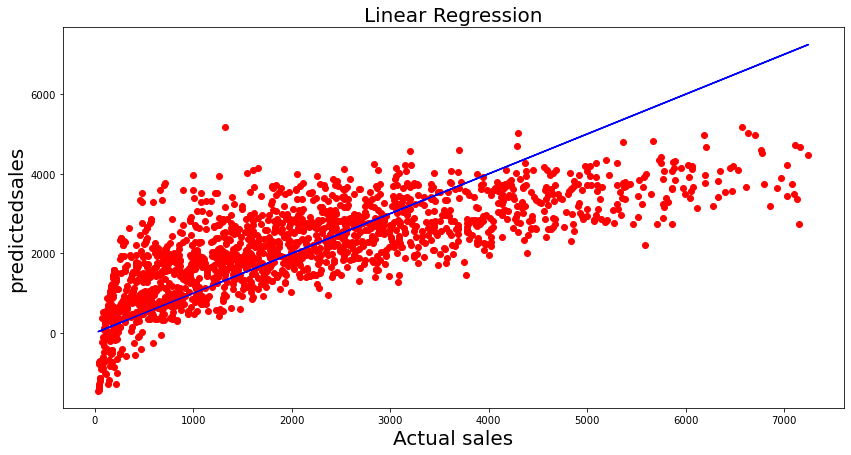

In [210]:
plt.figure(figsize=(14,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales",fontsize=20)
plt.ylabel("predictedsales",fontsize=20)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [211]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [212]:
def regressor(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("Mean squared Error is:",mean_squared_error(y_test,pred))
    print("r2_score is:",r2_score(y_test,pred))
    print("cross_validation_score is:",cross_val_score(model,x,y,cv=5).mean())

# LinearRegression

In [213]:
model=LinearRegression()
regressor(model,x,y)

Mean squared Error is: 1109790.3346055346
r2_score is: 0.5534522729326856
cross_validation_score is: 0.5417366503180174


# L1--LassoRegression

In [214]:
model=Lasso(alpha=0.001)
regressor(model,x,y)

Mean squared Error is: 1109585.8062196109
r2_score is: 0.5535345692755236
cross_validation_score is: 0.5417104884670738


# L2--Ridge Regression

In [215]:
model=Ridge(alpha=0.0001)
regressor(model,x,y)

Mean squared Error is: 1109790.262239893
r2_score is: 0.5534523020505395
cross_validation_score is: 0.5417366504036


# ElasticNetRegression

In [216]:
model=ElasticNet(alpha=0.0001)
regressor(model,x,y)

Mean squared Error is: 1109521.433556823
r2_score is: 0.5535604709844832
cross_validation_score is: 0.5416543322148076


# DecissionTreeRegressor

In [217]:
model=DecisionTreeRegressor(random_state=63)
regressor(model,x,y)

Mean squared Error is: 2093777.4032982413
r2_score is: 0.15752416355287435
cross_validation_score is: 0.14396165386428403


# RandomForestRegressor

In [218]:
model=RandomForestRegressor()
regressor(model,x,y)

Mean squared Error is: 1088907.1773012888
r2_score is: 0.5618550550956019
cross_validation_score is: 0.5359671781383932


# KNN

In [219]:
model=KNeighborsRegressor()
regressor(model,x,y)

Mean squared Error is: 1307720.3769829257
r2_score is: 0.4738109138525698
cross_validation_score is: 0.47505633197595676


# GradientBoostRegressor

In [220]:
model=GradientBoostingRegressor()
regressor(model,x,y)

Mean squared Error is: 985040.3867888111
r2_score is: 0.6036480656984646
cross_validation_score is: 0.58170527862405


# AdaBoostRegressor

In [221]:
model=AdaBoostRegressor()
regressor(model,x,y)

Mean squared Error is: 1078931.2626397049
r2_score is: 0.5658690763738924
cross_validation_score is: 0.5463485414057262


# HyperParameterTuning

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
params={'n_estimators':[1,2,3],     
        'criterion':['squared_error','mse'],
        'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,params)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 3}


In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2_score',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2_score 94.0405752285335


In [ ]:
#splitting the data by Test.csv
x=df2_new.drop("Item_Outlet_Sales",axis=1)
y=df2_new["Item_Outlet_Sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
#predict the values
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Predicted sales",pred)
print("actual sales",y_test)

In [ ]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred})
df

# we are getting r2_score 93,cross_val_score 54 for RandomForestRegressor

# saving the model

In [ ]:

import pickle
filename='Bigdatamart_sales_prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))